<html>
  <h1 align="center";> Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones
  </h1>
<hr>
  <h3 align="center";>
  Edición 2022
  </h3>
<hr>
  <h1 align="center";>
  Llamados Atendidos de Violencia Familiar Unificado con Series Temporales
  </h1>
<hr>
  <h2 align="center";>
  Trabajo Práctico 2 - Análisis y Curación de Datos
  </h2>
</html>

## Mentora:
- Isabel Rivadero

## Integrantes:
- Rinaudo, Eleana
- Sulca, Anahí

## Descripción

Los datos corresponden a información recopilada correspondiente a los llamados de todo el país atendidos por los y las profesionales del 137 sobre casos de Violencia Familiar desde Enero de 2017 hasta Febrero del 2022 organizados de manera unificada.

Pueden consultar en:
[Dataset Línea 137 - Victimas de Violencia Familiar](http://datos.jus.gob.ar/dataset/linea-137-victimas-de-violencia-familiar)

El dataset contiene información de:
-  `caso id`
- `descripcion del llamante`
- `género del llamante`
- `tipo de violencia`
- `género de la víctima`
- `cantidad de victimas`
- `cantidad de agresores`
- `género del agresor`
- `relación con la víctima`
- `fecha`
- `hora de la llamada`.

Repositorio con los datos listos para procesar:
- [Repositorio Mentoría](https://github.com/IsabelRivadero/ir-mentoria2022)

---
## Objetivo

Analizar qué variables tienen datos suficientes como para obtener resultados
significativos y con respecto a que, por ejemplo no hay cantidad suficiente de
información para un análisis anual incluyendo el 2022, y ver que variables no
y desecharlas según algún criterio comentandolo brevemente. 

Descripción de tipos de variables, limpieza de filas con `NaNs`. 

Explicar cuáles de los análisis de variables realizados, contienen información importante y cuáles bajo algún criterio se deciden descartar.

---
## Consignas:

1. Realizar limpieza de datos en caso de faltar o ser necesario, haciendo foco
en los tipos de datos y búsquedas de criterios para limpiar filas(lo que espero
es que expliquen con sus palabras la razón por la que deciden dropear algo).
La limpieza y curación total debe incluir:
  -  Análisis de tipos, NaNs, unificación de categorías equivalentes.
  -  Transformación de string a datos temporales.
  -  Faltaría relacionar las demás columnas buscando ampliar el análisis ya
  hecho.
  -  Breve descripción de lo que se observa.

2. Visualizaciones para relaciones que se hayan quedado con ganas de
experimentar o que tengan información que consideren de importancia para
describir los datos y sus relaciones de manera más completa. Al pie de cada
gráfico describir lo que se observa.


---
## A modo de guía buscar responder las siguientes preguntas con el análisis:
- ¿De qué género son los/las denunciantes?
- ¿Qué relación existe con el/la agresor?  
- ¿Qué vínculo existe entre la víctima con el llamante? 
- ¿Cuál es la relación entre la derivación de la llamada y el llamante? 
- ¿Cuál es la cantidad de víctimas/agresores?
- ¿Existieron días, o periodos sin llamadas? con llamadas mínimas?
- ¿Existen tendencias a la estacionariedad?
- ¿Cuáles son las fechas y horas que se dieron como pico?
- ¿Cuáles son las fechas y horas que se darán como pico a futuro?

<html>
<hr>
  <h1 align="center";>
  Desarrollo
  </h1>
</html>

## Importación de librerías

Importamos la librerías que vamos a utilizar en la Mentoría.

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

pd.options.mode.chained_assignment = None
pd.set_option("display.max_columns", 20)
pd.set_option("display.max_rows", 20)
sns.set_context("talk")


## Lectura del dataset

Detalle de los llamados de todo el país atendidos por las y los profesionales de la Línea 137, de alcance nacional, sobre casos de Violencia Familiar. La unidad de análisis en este recurso es la víctima principal del caso. Cada fila identifica un llamado y su víctima principal. Corresponde al período comprendido desde Enero de 2017 hasta Febrero del 2022 organizados de manera unificada. Pueden consultar mas información en
[Dataset Línea 137 - Victimas de Violencia Familiar](http://datos.jus.gob.ar/dataset/linea-137-victimas-de-violencia-familiar).

Para poder leer nuestro dataset necesitamos descargarlo desde el [Repositorio de la Mentoría](https://raw.githubusercontent.com/eleanarinaudo/Linea-137-Diplo2022/main/csv/linea137.csv).


In [2]:
url = "https://raw.githubusercontent.com/eleanarinaudo/Linea-137-Diplo2022/main/csv/linea137.csv"
df = pd.read_csv(url, parse_dates=[0])
linea137_df = df.copy()


Creamos el DataFrame que lo asignamos con la variable `linea137_df` y, además, usamos el método `pd.read_csv` que lee el dataset en Dataframe.


Veamos el contenido del DataFrame `linea137_df` que es el mismo que hicimos en la notebook anterior.

In [3]:
linea137_df= linea137_df.rename(columns={'Unnamed: 0': 'index'})
linea137_df.head()


,index,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha,llamado_hora
0,0,344552.0,Comisaría,Masculino,Otro/a no Familiar,Física y psicológica,Femenino,3,1,Masculino,Pareja,La víctima no aceptó la intervención del Equip...,2017-01-01,1:37
1,1,344553.0,Comisaría,Femenino,Sin datos,Física y psicológica,Femenino,2,1,Masculino,Hermano/a,Llamante solicitó información y/o orientación,2017-01-01,6:42
2,2,344554.0,Víctima,Femenino,Madre,Física y psicológica,Femenino,1,1,Masculino,Pareja,Llamante solicitó información y/o orientación,2017-01-01,6:48
3,3,344555.0,Víctima,Femenino,No hay niñas/os,Física y psicológica,Femenino,1,1,Masculino,Pareja,Llamante solicitó información y/o orientación,2017-01-01,6:54
4,4,344556.0,Comisaría,Masculino,Otro/a no Familiar,Psicológica,Masculino,1,1,Femenino,Madre,Llamante solicitó información y/o orientación,2017-01-01,7:11


Usamos el método `head()` que nos retorna las primeras cinco filas.

## Partimos de un dataframe con las siguientes características:

Con la funcion `.shape`, nos devuelve la cantidad de **filas** de nuestro conjunto de datos y el segundo valor es la cantidad de **columnas**.

In [4]:
print("Cantidad de filas:", linea137_df.shape[0])
print("Cantidad de columnas:", linea137_df.shape[1])
print("Cantidad de datos:", linea137_df.shape)


Cantidad de filas: 45703
Cantidad de columnas: 14
Cantidad de datos: (45703, 14)


La función `.columns`, nos devuelve una lista de los nombres de cada una de las **columnas** de nuestro `DataFrame`.

Es importante saber el nombre de las **columnas** de nuestro `DataFrame` así podemos trabajar con los datos de las columnas de nuestro interés y aplicar diferentes análisis para obtener conclusiones.

In [5]:
list(linea137_df.columns)


['index',
 'caso_id',
 'llamante_descripcion',
 'llamante_genero',
 'llamante_vinculo_ninios_presentes',
 'violencia_tipo',
 'victima_genero',
 'victima_cantidad',
 'agresor_cantidad',
 'agresor_genero',
 'agresor_relacion_victima',
 'llamado_derivacion',
 'llamado_fecha',
 'llamado_hora']

# Datos


- Tipo de Datos:
  - Variable Aleatoria Categóricas
    1. `llamante_descripcion`
    2. `llamante_genero`
    3. `llamante_vinculo_ninios_presentes`
    4. `violencia_tipo`
    5. `victima_genero`
    6. `agresor_genero`
    7. `agresor_relacion_victima`
    8. `llamado_derivacion`
  - Variable Aleatoria Numérica:
    1. `victima_cantidad`
    2. `agresor_cantidad`


Con el método `dtypes` podemos acceder a los tipos de datos del csv. 

El tipo `object` se utiliza para representar cualquier variable ordinales, `float64` para representar tipos continuos e `int64` como tipos discretos.

In [6]:
linea137_df.dtypes[:20]


index                                 object
caso_id                              float64
llamante_descripcion                  object
llamante_genero                       object
llamante_vinculo_ninios_presentes     object
violencia_tipo                        object
victima_genero                        object
victima_cantidad                       int64
agresor_cantidad                       int64
agresor_genero                        object
agresor_relacion_victima              object
llamado_derivacion                    object
llamado_fecha                         object
llamado_hora                          object
dtype: object

### Valores nulos
Antes de analizar cada una de las columnas por separado, vamos a detectar valores nulos en el dataframe, para ello usaremos `isnull()`

In [7]:
linea137_df.isnull().sum()


index                                 0
caso_id                               1
llamante_descripcion                  0
llamante_genero                       0
llamante_vinculo_ninios_presentes     0
violencia_tipo                       20
victima_genero                        0
victima_cantidad                      0
agresor_cantidad                      0
agresor_genero                        0
agresor_relacion_victima              0
llamado_derivacion                    0
llamado_fecha                         0
llamado_hora                          0
dtype: int64

Se observa `1` valor nulo en la columna `caso_id` y `20` valores nulos en `violencia_tipo`. Debido a que la cantidad de valores no es grande, se eliminan las filas que contienen dicha informacion.

In [8]:
linea137_df.drop(linea137_df[(linea137_df.violencia_tipo.isnull() | linea137_df.caso_id.isnull())].index, inplace=True)
linea137_df.isnull().sum()


index                                0
caso_id                              0
llamante_descripcion                 0
llamante_genero                      0
llamante_vinculo_ninios_presentes    0
violencia_tipo                       0
victima_genero                       0
victima_cantidad                     0
agresor_cantidad                     0
agresor_genero                       0
agresor_relacion_victima             0
llamado_derivacion                   0
llamado_fecha                        0
llamado_hora                         0
dtype: int64

### Datos Duplicados

Para el análisis de los datos duplicados, se usaron una cantidad de columnas para la evaluación. Las mismas fueron: 
- `caso_id`
- `llamado_derivacion`
- `llamante_descripcion`
- `llamado_fecha`
- `llamado_hora`
- `agresor_genero`
- `victima_genero`

In [9]:
duplicados = df.duplicated(
    subset=[
        "caso_id",
        "llamado_derivacion",
        "llamante_descripcion",
        "llamado_fecha",
        "llamado_hora",
        "agresor_genero",
        "victima_genero",
    ],
    keep=False,
)
print(
    "El porcentaje de valores duplicados es de: ",
    round(len(df[duplicados]) / len(df) * 100, 2),
    "%",
)
df[duplicados].sort_values(by="caso_id")


El porcentaje de valores duplicados es de:  0.43 %


,index,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha,llamado_hora
12497,12497,20362.0,Víctima,Masculino,No hay niñas/os,Física y psicológica,Masculino,2,1,Masculino,Hijo/a,Llamante solicitó información y/o orientación,2018-04-29,1:26
12496,12496,20362.0,Víctima,Masculino,No hay niñas/os,Física y psicológica,Masculino,2,1,Masculino,Hijo/a,Llamante solicitó información y/o orientación,2018-04-29,1:26
3964,3964,53381.0,Profesionales de la línea 137,NS/NC,Sin datos,No aplica,NS/NC,0,0,NS/NC,NS/NC,Comunicación con los Equipos Móviles,2017-04-24,1:19
3963,3963,53381.0,Profesionales de la línea 137,NS/NC,Sin datos,No aplica,NS/NC,0,0,NS/NC,NS/NC,Comunicación con los Equipos Móviles,2017-04-24,1:19
34957,34957,65232.0,Víctima,Femenino,Sin datos,Psicológica,Femenino,1,1,Femenino,Hermano/a,Llamante solicitó información y/o orientación,2021-01-03,0:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43290,43290,441282.0,Vecina/o,NS/NC,Otro/a no Familiar,Psicológica,Femenino,1,1,NS/NC,NS/NC,Llamante solicitó información y/o orientación,2021-11-21,14:44
44436,44436,441695.0,Víctima,Femenino,No hay niñas/os,Física y psicológica,Femenino,1,1,Masculino,Pareja,Llamante solicitó información y/o orientación,2022-01-12,12:49
44437,44437,441695.0,Víctima,Femenino,No hay niñas/os,Física y psicológica,Femenino,1,1,Masculino,Pareja,Llamante solicitó información y/o orientación,2022-01-12,12:49
43947,43947,441960.0,Familiar,Femenino,Otro/a Familiar,Psicológica,Femenino,1,1,Femenino,Madre,Llamante solicitó información y/o orientación,2021-12-18,3:02


Se decidió conservar solo uno de los datos duplicados.

Eliminamos el resto con el método `drop_duplicates`

In [10]:
linea137_df.drop_duplicates(
    subset=[
        "caso_id",
        "llamado_derivacion",
        "llamante_descripcion",
        "llamado_fecha",
        "llamado_hora",
        "agresor_genero",
        "victima_genero",
    ],
    keep="first",
    inplace=True,
)
print(
    "El dataset ahora tiene",
    linea137_df.shape[0],
    "datos a comparación del original que tenía",
    df.shape[0],
    "datos.",
)


El dataset ahora tiene 45583 datos a comparación del original que tenía 45703 datos.


<html>
<hr>
  <h1 align="center";>
  Variables Aleatorias Categóricas
  </h1>
<hr>
</html>

<html>
  <h1 align="center";>
  1. Análisis columna <code>llamante_descripcion</code>
  </h1>
</html>

Describe quién realiza el llamado. Puede indicar personas o instituciones.

#### Primero vemos qué valores están tomando cada una de las variables.

In [11]:
linea137_df.llamante_descripcion.value_counts()


Víctima                          13937
Comisaría                        10960
Familiar                          5878
Otra/o particular                 5230
Profesionales de la línea 137     3918
Vecina/o                          2500
Otra institución                  1338
NS/NC                             1031
Hospital                           625
Agresor/a                          166
Name: llamante_descripcion, dtype: int64

Graficamos un **countplot** que muestra los conteos de observaciones en cada variables categóricas usando barras, en este caso **la descripción del llamante**.

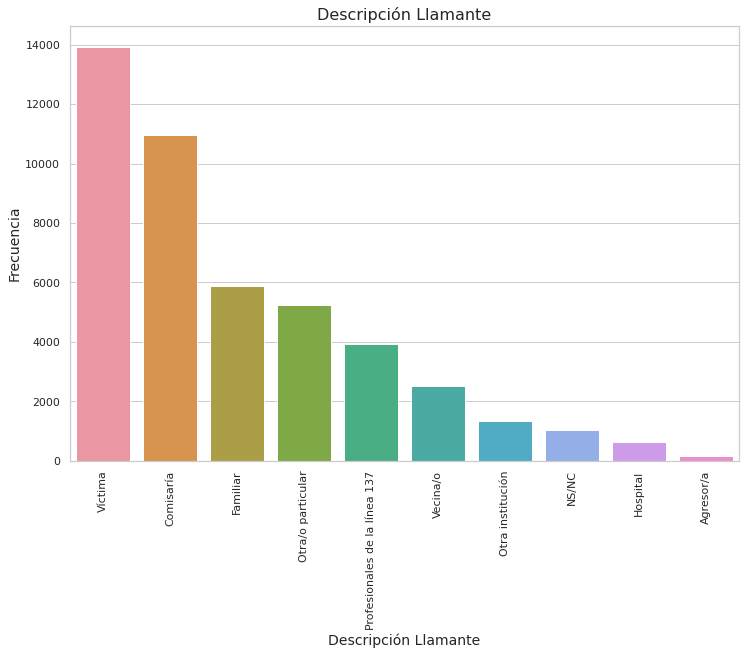

In [12]:
fig = plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid", palette="Set2")
sns.countplot(
    data=linea137_df,
    x="llamante_descripcion",
    order=linea137_df["llamante_descripcion"].value_counts().index,
)

plt.xlabel("Descripción Llamante", size=14)
plt.ylabel("Frecuencia", size=14)
plt.title("Descripción Llamante", size=16)
plt.xticks(rotation=90)
plt.show()


In [13]:
print(
    "De las",
    len(linea137_df),
    "llamadas totales:\n -",
    round(
        len(linea137_df[linea137_df["llamante_descripcion"] == "Víctima"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas por la misma víctima.\n -",
    round(
        len(linea137_df[linea137_df["llamante_descripcion"] == "Comisaría"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas desde la comisaría.\n -",
    round(
        len(linea137_df[linea137_df["llamante_descripcion"] == "Familiar"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas por un familiar de la víctima.\n -",
    round(
        len(linea137_df[linea137_df["llamante_descripcion"] == "Otra/o particular"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas por otra persona.\n -",
    round(
        len(
            linea137_df[
                linea137_df["llamante_descripcion"] == "Profesionales de la línea 137"
            ]
        )
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas por un profesional de la Línea 137.\n -",
    round(
        len(linea137_df[linea137_df["llamante_descripcion"] == "Vecina/o"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas por un vecino/a de la víctima.\n -",
    round(
        len(linea137_df[linea137_df["llamante_descripcion"] == "Otra institución"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas por otra institución.\n -",
    round(
        len(linea137_df[linea137_df["llamante_descripcion"] == "NS/NC"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% sin datos.\n -",
    round(
        len(linea137_df[linea137_df["llamante_descripcion"] == "Hospital"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas en el Hospital.\n -",
    round(
        len(linea137_df[linea137_df["llamante_descripcion"] == "Agresor/a"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas por el agresor/a de la víctima.\n ",
)


De las 45583 llamadas totales:
 - 30.57 % fueron hechas por la misma víctima.
 - 24.04 % fueron hechas desde la comisaría.
 - 12.9 % fueron hechas por un familiar de la víctima.
 - 11.47 % fueron hechas por otra persona.
 - 8.6 % fueron hechas por un profesional de la Línea 137.
 - 5.48 % fueron hechas por un vecino/a de la víctima.
 - 2.94 % fueron hechas por otra institución.
 - 2.26 % sin datos.
 - 1.37 % fueron hechas en el Hospital.
 - 0.36 % fueron hechas por el agresor/a de la víctima.
 


>**Observación:**
>
>- Se puede observar, desde el gráfico, que en el primer lugar las llamadas fueron realizadas por la misma víctima.
>- En segundo lugar vienen las llamadas hechas desde la comisaría y en tercer lugar llamadas hechas por un familiar de la víctima.
>- También llaman terceros no familiares de las víctimas, profesionales de la línea 137 o hasta vecinos de las mismas.
>- En conclusión, las llamadas realizadas por las mismas víctimas son inferiores a la realizadas por un externo de la víctima.

<html>
  <h1 align="center";>
  2. Análisis columna <code>llamante_genero</code>
  </h1>
</html>
Describe el género de la persona que realiza el llamado. Puede tomar los valores:

- Masculino
- Femenino
- Trans
- NS/NC: No sabe / No contesta



#### Primero vemos qué valores están tomando cada una de las variables.

In [14]:
linea137_df.llamante_genero.value_counts()


Femenino       29043
Masculino      10307
NS/NC           6203
Transgénero       30
Name: llamante_genero, dtype: int64

Graficamos un **countplot** que muestra los conteos de observaciones en cada variable categórica usando barras, en este caso **el género del llamante**.

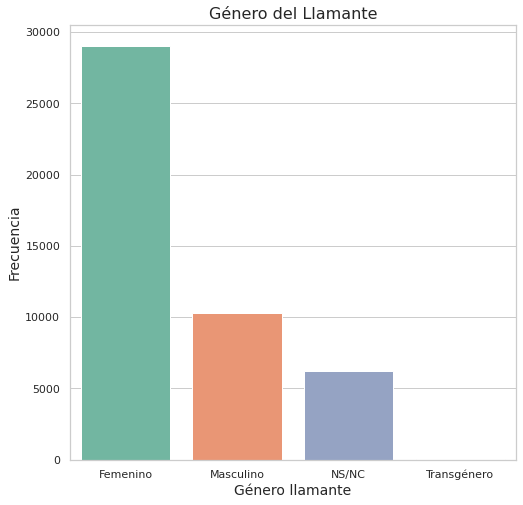

In [15]:
fig = plt.figure(figsize=(8, 8))
sns.set_theme(style="whitegrid", palette="Set2")
sns.countplot(
    data=linea137_df,
    x="llamante_genero",
    order=linea137_df["llamante_genero"].value_counts().index,
)

plt.xlabel("Género llamante", size=14)
plt.ylabel("Frecuencia", size=14)
plt.title("Género del Llamante", size=16)
plt.show()


In [16]:
print(
    "De las",
    len(linea137_df),
    "llamadas totales: \n -",
    round(
        len(linea137_df[linea137_df["llamante_genero"] == "Femenino"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas por una persona de género Femenino. \n -",
    round(
        len(linea137_df[linea137_df["llamante_genero"] == "Masculino"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas por una persona de género Masculino. \n -",
    round(
        len(linea137_df[linea137_df["llamante_genero"] == "NS/NC"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% sin datos. \n -",
    round(
        len(linea137_df[linea137_df["llamante_genero"] == "Transgénero"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas por una persona de género Transgénero.",
)


De las 45583 llamadas totales: 
 - 63.71 % fueron hechas por una persona de género Femenino. 
 - 22.61 % fueron hechas por una persona de género Masculino. 
 - 13.61 % sin datos. 
 - 0.07 % fueron hechas por una persona de género Transgénero.


>**Observación:**
>
>- Se puede ver en el gráfico que la gran mayoría de las llamadas son hechas por el género Femenino y un porcentaje menos al 0% realizado por el género Transgénero
>- La cantidad de llamadas sin datos puede ser que el llamante no quiso revelar su género o no tuvo tiempo suficiente para poder brindar esa información (por factores externos a ellos/as).

<html>
  <h1 align="center";>
  3. Análisis columna <code>llamante_vinculo_ninios_presentes</code>
  </h1>
</html>

Describe el vínculo que tiene la persona que realiza el llamado con niños/as presentes en el hecho

#### Primero vemos qué valores están tomando cada una de las variables.

In [17]:
linea137_df.llamante_vinculo_ninios_presentes.value_counts()


Sin datos             10811
Otro/a no Familiar    10613
No hay niñas/os       10363
Madre                  8140
Otro/a Familiar        3141
Padre                  1637
Hermano/a               849
Padrastro                29
Name: llamante_vinculo_ninios_presentes, dtype: int64

Graficamos un **countplot** que muestra los conteos de observaciones en cada variable categórica usando barras, en este caso **del vínculo del llamante con niñas/os presentes**.

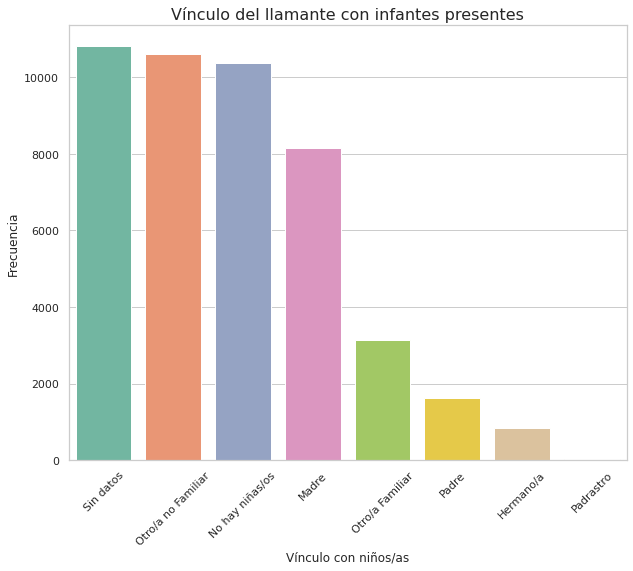

In [18]:
fig = plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid", palette="Set2")
sns.countplot(
    data=linea137_df,
    x="llamante_vinculo_ninios_presentes",
    order=linea137_df["llamante_vinculo_ninios_presentes"].value_counts().index,
)

plt.xlabel("Vínculo con niños/as", size=12)
plt.ylabel("Frecuencia", size=12)
plt.title("Vínculo del llamante con infantes presentes", size=16)
plt.xticks(rotation=45)
plt.show()



In [19]:
print(
    "De las",
    len(linea137_df),
    "llamadas totales:\n -",
    round(
        len(linea137_df[linea137_df["llamante_vinculo_ninios_presentes"] == "Sin datos"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% decidió no revelar la relación con niño/a o puede ser que no hubo niño/a presente. \n -",
    round(
        len(
            linea137_df[
                linea137_df["llamante_vinculo_ninios_presentes"] == "Otro/a no Familiar"
            ]
        )
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas por personas no familiares del niñas/os.\n -",
    round(
        len(
            linea137_df[
                linea137_df["llamante_vinculo_ninios_presentes"] == "No hay niñas/os"
            ]
        )
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas sin niñas/os presentes.\n -",
    round(
        len(linea137_df[linea137_df["llamante_vinculo_ninios_presentes"] == "Madre"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas por la madre de niñas/os. \n -",

    round(
        len(
            linea137_df[
                linea137_df["llamante_vinculo_ninios_presentes"] == "Otro/a Familiar"
            ]
        )
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas por otro/a familiar de niñas/os.\n -",
    round(
        len(linea137_df[linea137_df["llamante_vinculo_ninios_presentes"] == "Padre"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas por el padre del niñas/os.\n -",
    round(
        len(
            linea137_df[linea137_df["llamante_vinculo_ninios_presentes"] == "Hermano/a"]
        )
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas por el hermano/a del niño/a. \n -",
    round(
        len(
            linea137_df[linea137_df["llamante_vinculo_ninios_presentes"] == "Padrastro"]
        )
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron hechas por el padrastro del niños/as.",
)


De las 45583 llamadas totales:
 - 23.72 % decidió no revelar la relación con niño/a o puede ser que no hubo niño/a presente. 
 - 23.28 % fueron hechas por personas no familiares del niñas/os.
 - 22.73 % fueron hechas sin niñas/os presentes.
 - 17.86 % fueron hechas por la madre de niñas/os. 
 - 6.89 % fueron hechas por otro/a familiar de niñas/os.
 - 3.59 % fueron hechas por el padre del niñas/os.
 - 1.86 % fueron hechas por el hermano/a del niño/a. 
 - 0.06 % fueron hechas por el padrastro del niños/as.


>**Observación:**
>
>- Se puede observar, en primer lugar de los casos el llamante no brindó información sobre si hay niñas/os presentes.
>- En segundo lugar, el llamante no es familiar de las/los niñas/os. 
>- En tercer lugar, el las llamadas directamente no hay niñas/os presentes.
>- En cuarto lugar, el llamante es la madre de las/los niñas/os presentes, en 17.84% de los casos.
>- En cuarto caso, el llamante es otro familiar de las/los niñas/os.
>- El resto de los casos fueron realizados por el padre, hermano/a o el padrastro de los niños/as.




<html>
  <h1 align="center";>
  4. Análisis columna <code>violencia_tipo</code>
  </h1>
</html>

Describe el **tipo de violencia** que se denuncia. Puede tomar los valores:

- Económica y psicológica
- Económica, física y psicológica
- Física y psicológica
- Física, sexual y psicológica
- No aplica
- Psicológica
- Sexual y psicológica
- Sexual, económica y psicológica



#### Primero vemos qué valores están tomando cada una de las variables.

In [20]:
linea137_df.violencia_tipo.value_counts()


Física y psicológica                       21818
Psicológica                                14273
No aplica                                   7404
Física, sexual y psicológica                 390
Económica y psicológica                      388
Económica, física y psicológica              381
No Aplica                                    254
Sexual y psicológica                         250
Otras                                        147
Física, psicológica y económica              143
Económica, Física y psicológica               84
No es un caso de Violencia Familiar           30
Sexual, económica y psicológica               15
Física, sexual, psicológica y económica        6
Name: violencia_tipo, dtype: int64

**Unificamos** algunos datos repetidos.

Primero, hacemos una copia del dataset que estamos trabajando

In [21]:
linea137_copy = linea137_df.copy()
linea137_copy.head()

,index,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha,llamado_hora
0,0,344552.0,Comisaría,Masculino,Otro/a no Familiar,Física y psicológica,Femenino,3,1,Masculino,Pareja,La víctima no aceptó la intervención del Equip...,2017-01-01,1:37
1,1,344553.0,Comisaría,Femenino,Sin datos,Física y psicológica,Femenino,2,1,Masculino,Hermano/a,Llamante solicitó información y/o orientación,2017-01-01,6:42
2,2,344554.0,Víctima,Femenino,Madre,Física y psicológica,Femenino,1,1,Masculino,Pareja,Llamante solicitó información y/o orientación,2017-01-01,6:48
3,3,344555.0,Víctima,Femenino,No hay niñas/os,Física y psicológica,Femenino,1,1,Masculino,Pareja,Llamante solicitó información y/o orientación,2017-01-01,6:54
4,4,344556.0,Comisaría,Masculino,Otro/a no Familiar,Psicológica,Masculino,1,1,Femenino,Madre,Llamante solicitó información y/o orientación,2017-01-01,7:11


Vamos a realizar un **conteo de frecuencias** de los **tipos de violencia**.

La columna que contiene información sobre los tipos de violencia utilizados es `violencia_tipo`. 

Sus valores son strings con los tipos de violencia separados por comas y con "y". Además unificamos algunos datos repetidos.


In [22]:
relevant_columns = ['violencia_tipo', 'index']

def split_violence(violence_str):
  if not isinstance(violence_str, str):
    return list()

  violence_str = violence_str.title()\
    .replace('No Aplica', 'No-Aplica')\
    .replace('No Es Un Caso De Violencia Familiar', 'Otras')\
    .replace('Y', "")

  return [lang.strip().replace(',', '')
          for lang in violence_str.split()]

linea137_copy.loc[:, 'tipo_violencia'] = linea137_copy.violencia_tipo\
    .apply(split_violence)

df_violence = linea137_copy.tipo_violencia\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(linea137_copy[relevant_columns])\
    .rename(columns={0: 'tipo_violencia'})



In [23]:
df_violence.tipo_violencia.value_counts()

Psicológica    37748
Física         22822
No-Aplica       7658
Económica       1017
Sexual           661
Otras            177
Name: tipo_violencia, dtype: int64

Quedando los datos de la siguiente manera:

In [24]:
df_violence.head()

,tipo_violencia,violencia_tipo,index
0,Física,Física y psicológica,0
0,Psicológica,Física y psicológica,0
1,Física,Física y psicológica,1
1,Psicológica,Física y psicológica,1
2,Física,Física y psicológica,2


Vemos qué valores están tomando cada una de las variables con el nuevo dataframe.

In [25]:
df_violence["tipo_violencia"].value_counts()


Psicológica    37748
Física         22822
No-Aplica       7658
Económica       1017
Sexual           661
Otras            177
Name: tipo_violencia, dtype: int64

Graficamos un **countplot** que muestra los conteos de observaciones en cada contenedor categórico usando barras, en este caso del **tipo de violencia**.

Text(0.5, 1.0, 'Tipo de Violencia que se Denuncia')

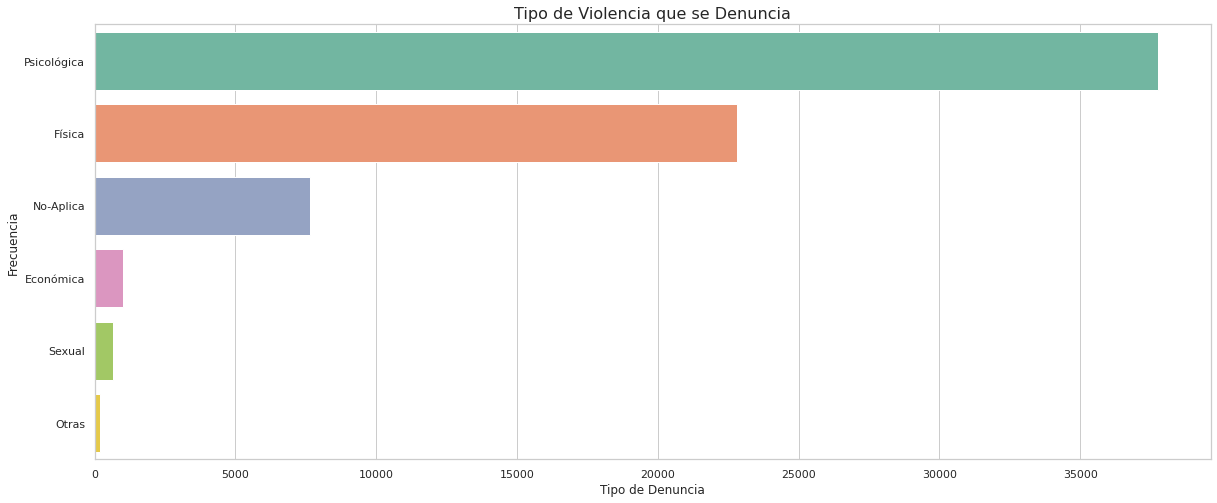

In [26]:
fig = plt.figure(figsize=(20, 8))
sns.set_theme(style="whitegrid", palette="Set2")
sns.countplot(
    y=df_violence.tipo_violencia,
    order=pd.value_counts(df_violence["tipo_violencia"]).iloc[:20].index,
);
plt.xlabel("Tipo de Denuncia", size=12)
plt.ylabel("Frecuencia", size=12)
plt.title("Tipo de Violencia que se Denuncia", size=16)


In [27]:
print(
    "De las",
    len(linea137_df),
    "llamadas totales:\n -",
    round(
        len(df_violence[df_violence["tipo_violencia"] == "Psicológica"])
        / len(df_violence)
        * 100,
        2,
    ),
    "% indicaron violencia tipo Psicológica.\n -",
    round(
        len(df_violence[df_violence["tipo_violencia"] == "Física"])
        / len(df_violence)
        * 100,
        2,
    ),
    "% indicaron violencia tipo Física.\n -",
    round(
        len(df_violence[df_violence["tipo_violencia"] == "No-Aplica"])
        / len(df_violence)
        * 100,
        2,
    ),
    "% indicaron que no aplica tipo de violencia.\n -",
    round(
        len(df_violence[df_violence["tipo_violencia"] == "Económica"])
        / len(df_violence)
        * 100,
        2,
    ),
    "% indicaron violencia tipo Económica.\n -",
    round(
        len(df_violence[df_violence["tipo_violencia"] == "Sexual"])
        / len(df_violence)
        * 100,
        2,
    ),
    "% indicaron violencia tipo Sexual.\n -",
    round(
        len(df_violence[df_violence["tipo_violencia"] == "Otras"])
        / len(df_violence)
        * 100,
        2,
    ),
    "% indicaron que es otro tipo de violencia.",
)



De las 45583 llamadas totales:
 - 53.86 % indicaron violencia tipo Psicológica.
 - 32.56 % indicaron violencia tipo Física.
 - 10.93 % indicaron que no aplica tipo de violencia.
 - 1.45 % indicaron violencia tipo Económica.
 - 0.94 % indicaron violencia tipo Sexual.
 - 0.25 % indicaron que es otro tipo de violencia.


>**Observación:**
>
>- Se puede observar una clara predominancia de denuncias por violencia de tipo Psicológica y en segundo lugar el tipo de violencia física.
>- El tercer caso de las llamadas no aplica o indicaron que no es caso de tipo de violencia.
>- En cuarto lugar, la Económica y Sexual tienen menor predominancia de tipo de violencia.
>- Por último lugar, indicaron que es otro tipo de violencia.


Como creamos un nuevo **dataframe** en esta columna para poder analizar los tipos de violencia por separado, nos quedaría combinar con el dataset que venimos realizando.

Para ello, usamos la función `get_dummies` para la columna `tipo_violencia` con el objetivo de codificar.

In [28]:
df_violence = pd.get_dummies(df_violence, columns=["tipo_violencia"], drop_first=False)
df_violence


,violencia_tipo,index,tipo_violencia_Económica,tipo_violencia_Física,tipo_violencia_No-Aplica,tipo_violencia_Otras,tipo_violencia_Psicológica,tipo_violencia_Sexual
0,Física y psicológica,0,0,1,0,0,0,0
0,Física y psicológica,0,0,0,0,0,1,0
1,Física y psicológica,1,0,1,0,0,0,0
1,Física y psicológica,1,0,0,0,0,1,0
2,Física y psicológica,2,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
45698,Física y psicológica,45698,0,0,0,0,1,0
45699,No aplica,45699,0,0,1,0,0,0
45700,No aplica,45700,0,0,1,0,0,0
45701,No aplica,45701,0,0,1,0,0,0


Primero, estandarizamos la columna de `index`

In [29]:
df_violence['index'] = pd.to_numeric(df_violence.index, errors='coerce')

In [30]:
linea137_df['index'] = pd.to_numeric(linea137_df.index, errors='coerce')

Creamos una lista de las columnas relevantes 

In [31]:
relevant_cols = [
    "index",
    "violencia_tipo",
    "violencia_type_Física",
    "violencia_type_No-Aplica",
    "violencia_type_Otras",
    "violencia_type_Psicológica",
    "violencia_type_Sexual",
]


Agrupamos las columnas con el método `groupby` 

In [32]:
df_violence = df_violence.groupby(['index']).sum()
df_violence.head()

,tipo_violencia_Económica,tipo_violencia_Física,tipo_violencia_No-Aplica,tipo_violencia_Otras,tipo_violencia_Psicológica,tipo_violencia_Sexual
index,,,,,,
0,0,1,0,0,1,0
1,0,1,0,0,1,0
2,0,1,0,0,1,0
3,0,1,0,0,1,0
4,0,0,0,0,1,0


Finalmente hacemos la combinacion de ambos datasets creados

In [33]:
merged_linea137_df = linea137_df.merge(
    df_violence, how='left',
    left_on='index', right_on='index'
)

merged_linea137_df = merged_linea137_df.drop(columns=['index'])
merged_linea137_df

,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha,llamado_hora,tipo_violencia_Económica,tipo_violencia_Física,tipo_violencia_No-Aplica,tipo_violencia_Otras,tipo_violencia_Psicológica,tipo_violencia_Sexual
0,344552.0,Comisaría,Masculino,Otro/a no Familiar,Física y psicológica,Femenino,3,1,Masculino,Pareja,La víctima no aceptó la intervención del Equip...,2017-01-01,1:37,0,1,0,0,1,0
1,344553.0,Comisaría,Femenino,Sin datos,Física y psicológica,Femenino,2,1,Masculino,Hermano/a,Llamante solicitó información y/o orientación,2017-01-01,6:42,0,1,0,0,1,0
2,344554.0,Víctima,Femenino,Madre,Física y psicológica,Femenino,1,1,Masculino,Pareja,Llamante solicitó información y/o orientación,2017-01-01,6:48,0,1,0,0,1,0
3,344555.0,Víctima,Femenino,No hay niñas/os,Física y psicológica,Femenino,1,1,Masculino,Pareja,Llamante solicitó información y/o orientación,2017-01-01,6:54,0,1,0,0,1,0
4,344556.0,Comisaría,Masculino,Otro/a no Familiar,Psicológica,Masculino,1,1,Femenino,Madre,Llamante solicitó información y/o orientación,2017-01-01,7:11,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45578,443713.0,Familiar,Femenino,Otro/a Familiar,Física y psicológica,Masculino,1,1,Masculino,Padre,No se desplazó un Equipo móvil por tratarse de...,2022-02-28,17:52,0,1,0,0,1,0
45579,443714.0,Otra/o particular,NS/NC,Sin datos,No aplica,NS/NC,0,0,NS/NC,NS/NC,Se trata de un conflicto familiar,2022-02-28,17:57,0,0,1,0,0,0
45580,443715.0,Otra/o particular,NS/NC,Sin datos,No aplica,NS/NC,0,0,NS/NC,NS/NC,Se trata de un conflicto familiar,2022-02-28,18:49,0,0,1,0,0,0
45581,443716.0,Otra/o particular,Femenino,Sin datos,No aplica,NS/NC,0,0,NS/NC,NS/NC,Se trata de un conflicto familiar,2022-02-28,18:52,0,0,1,0,0,0


In [34]:
linea137_df = merged_linea137_df.copy()

<html>
  <h1 align="center";>
  5. Análisis columna <code>victima_genero</code>
  </h1>
</html>

Describe el género de la víctima involucrada en el caso denunciado.

#### Primero vemos qué valores están tomando cada una de las variables.

In [35]:
linea137_df.victima_genero.value_counts()


Femenino       30351
NS/NC          10293
Masculino       4883
Transgénero       56
Name: victima_genero, dtype: int64

Graficamos un **countplot** que muestra los conteos de observaciones en cada variable categórica usando barras, en este caso del **género de la víctima**.

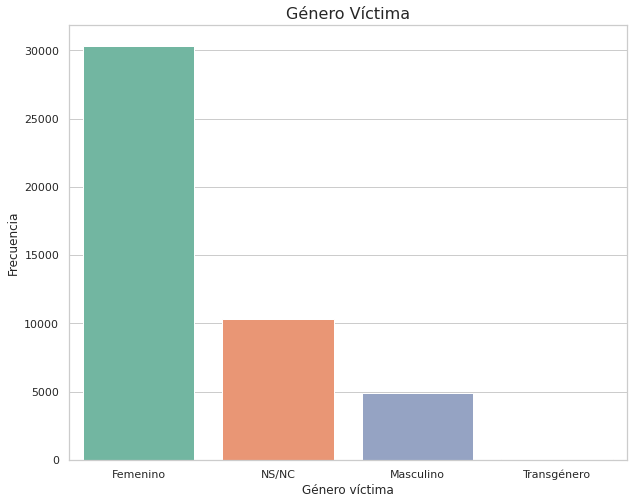

In [36]:
fig = plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid", palette="Set2")
sns.countplot(
    data=linea137_df,
    x="victima_genero",
    order=linea137_df["victima_genero"].value_counts().index,
)

plt.xlabel("Género víctima", size=12)
plt.ylabel("Frecuencia", size=12)
plt.title("Género Víctima", size=16)
plt.show()


In [37]:
print(
    "De las",
    len(linea137_df),
    "llamadas totales:\n -",
    round(
        len(linea137_df[linea137_df["victima_genero"] == "Femenino"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que la víctima es de género Femenino.\n -",
    round(
        len(linea137_df[linea137_df["victima_genero"] == "NS/NC"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% sin datos. \n -",
    round(
        len(linea137_df[linea137_df["victima_genero"] == "Masculino"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que la víctima es de género Masculino. \n -",
    round(
        len(linea137_df[linea137_df["victima_genero"] == "Transgénero"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que la víctima es de género Transgénero.",
)


De las 45583 llamadas totales:
 - 66.58 % indicaron que la víctima es de género Femenino.
 - 22.58 % sin datos. 
 - 10.71 % indicaron que la víctima es de género Masculino. 
 - 0.12 % indicaron que la víctima es de género Transgénero.


>**Observación:**
>
>- Se puede ver en esta distribución que en la gran mayoría de las llamadas, la víctima es de género femenino. 


<html>
  <h1 align="center";>
  6. Análisis columna <code>agresor_genero</code>
  </h1>
</html>

Describe el género del agresor. Puede tomar los valores:

-  Masculino
-  Femenino
-  Trans
-  NS/NC: No sabe / No contesta


In [38]:
linea137_df.agresor_genero.value_counts()


Masculino      27936
NS/NC          10750
Femenino        6883
Transgénero       14
Name: agresor_genero, dtype: int64

Graficamos un **countplot** que muestra los conteos de observaciones en cada variable categórica usando barras, en este caso del **género del agresor**.

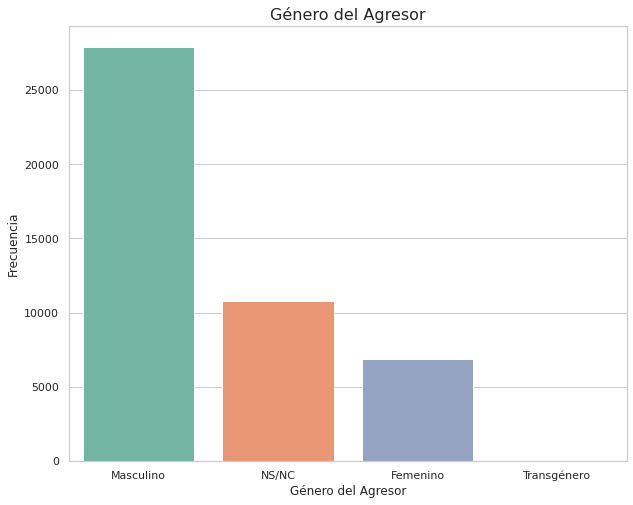

In [39]:
fig = plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid", palette="Set2")
sns.countplot(
    data=linea137_df,
    x="agresor_genero",
    order=linea137_df["agresor_genero"].value_counts().index,
)

plt.xlabel("Género del Agresor", size=12)
plt.ylabel("Frecuencia", size=12)
plt.title("Género del Agresor", size=16)
plt.show()


In [40]:
print(
    "De las",
    len(linea137_df),
    "llamadas totales:\n-",
    round(
        len(linea137_df[linea137_df["agresor_genero"] == "Masculino"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que el agresor es de género Masculino.\n-",
    round(
        len(linea137_df[linea137_df["agresor_genero"] == "NS/NC"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% no indica género del agresor.\n-",
    round(
        len(linea137_df[linea137_df["agresor_genero"] == "Femenino"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que la agresora es de género Femenino.\n-",
    round(
        len(linea137_df[linea137_df["agresor_genero"] == "Transgénero"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que el agresor es de género Transgénero.\n",
)


De las 45583 llamadas totales:
- 61.29 % indicaron que el agresor es de género Masculino.
- 23.58 % no indica género del agresor.
- 15.1 % indicaron que la agresora es de género Femenino.
- 0.03 % indicaron que el agresor es de género Transgénero.



>**Observación:**
>
>- Observamos en esta distribución que en la gran mayoría de las llamadas, el agresor es de género masculino. 
>- En segundo lugar, no hay información sobre el género del agresor.
>- En tercer lugar, una porción mucho menor de agresores es de género femenino. Una situación casi opuesta a la del género de la víctima.
>- En ultimo lugar es agresor es de género Transgénero, con un porcentaje menor al 0%.


<html>
  <h1 align="center";>
  7. Análisis columna <code>agresor_relacion_victima</code>        
  </h1>
</html>

Describe el vínculo que existe entre el agresor y la víctima involucrada en el caso, es decir indica la relación del **agresor** para con su víctima.


#### Primero vemos qué valores están tomando cada una de las variables.

In [41]:
linea137_df.agresor_relacion_victima.value_counts()


Pareja                   11937
NS/NC                    10547
Ex pareja                 8911
Madre                     3869
Padre                     3266
Hijo/a                    2809
Hermano/a                 1546
Otro/a no conviviente     1136
Otro/a conviviente         780
Padrastro                  595
Abuelo/a                   174
Madrastra                   13
Name: agresor_relacion_victima, dtype: int64

Graficamos un **countplot** que muestra los conteos de observaciones en cada contenedor categórico usando barras, en este caso de la **Relación con Agresor y la Víctima**.

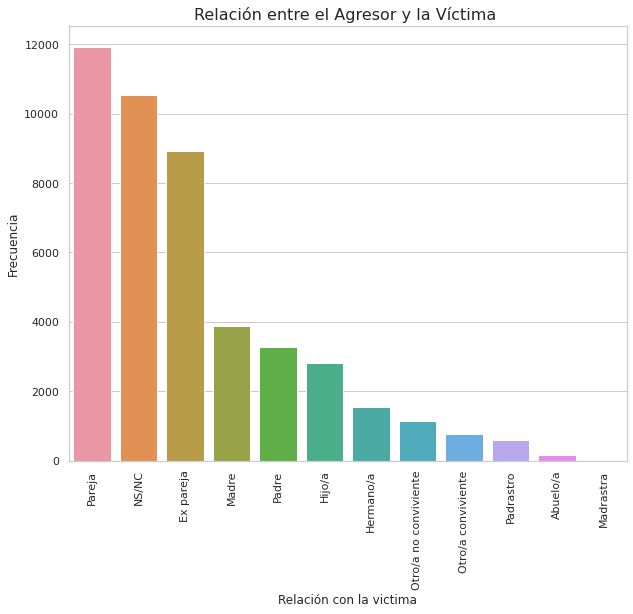

In [42]:
fig = plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid", palette="Set2")
sns.countplot(
    data=linea137_df,
    x="agresor_relacion_victima",
    order=linea137_df["agresor_relacion_victima"].value_counts().index,
)

plt.xlabel("Relación con la victima", size=12)
plt.ylabel("Frecuencia", size=12)
plt.title("Relación entre el Agresor y la Víctima ", size=16)
plt.xticks(rotation=90)
plt.show()


In [43]:
print(
    "De las",
    len(linea137_df),
    "llamadas totales:\n-",
    round(
        len(linea137_df[linea137_df["agresor_relacion_victima"] == "Pareja"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que el agresor es pareja de la víctima.\n-",

    round(
        len(linea137_df[linea137_df["agresor_relacion_victima"] == "Ex pareja"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que el agresor es ex-pareja de la víctima.\n-",
    round(
        len(linea137_df[linea137_df["agresor_relacion_victima"] == "Madre"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que el agresor es madre de la víctima.\n-",
    round(
        len(linea137_df[linea137_df["agresor_relacion_victima"] == "Padre"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que el agresor es padre de la víctima.\n-",
    round(
        len(linea137_df[linea137_df["agresor_relacion_victima"] == "Hijo/a"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que el agresor es hijo/a de la víctima.\n-",
    round(
        len(linea137_df[linea137_df["agresor_relacion_victima"] == "Hermano/a"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que el agresor es hermano/a de la víctima.\n-",
    round(
        len(
            linea137_df[
                linea137_df["agresor_relacion_victima"] == "Otro/a no conviviente"
            ]
        )
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que el agresor es otro/a no conviviente de la víctima.\n-",
    round(
        len(
            linea137_df[linea137_df["agresor_relacion_victima"] == "Otro/a conviviente"]
        )
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que el agresor es otro/a conviviente de la víctima.\n-",
    round(
        len(linea137_df[linea137_df["agresor_relacion_victima"] == "NS/NC"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% no indica relación del agresor con la víctima.\n-",
    round(
        len(linea137_df[linea137_df["agresor_relacion_victima"] == "Padrastro"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que el agresor es el padrastro conviviente de la víctima.\n-",
    round(
        len(linea137_df[linea137_df["agresor_relacion_victima"] == "Abuelo/a"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que el agresor es abuelo/a conviviente de la víctima.\n-",
    round(
        len(linea137_df[linea137_df["agresor_relacion_victima"] == "Madrastra"])
        / len(linea137_df)
        * 100,
        2,
    ),
    "% indicaron que el agresor es madrastra de la víctima.\n",
)


De las 45583 llamadas totales:
- 26.19 % indicaron que el agresor es pareja de la víctima.
- 19.55 % indicaron que el agresor es ex-pareja de la víctima.
- 8.49 % indicaron que el agresor es madre de la víctima.
- 7.16 % indicaron que el agresor es padre de la víctima.
- 6.16 % indicaron que el agresor es hijo/a de la víctima.
- 3.39 % indicaron que el agresor es hermano/a de la víctima.
- 2.49 % indicaron que el agresor es otro/a no conviviente de la víctima.
- 1.71 % indicaron que el agresor es otro/a conviviente de la víctima.
- 23.14 % no indica relación del agresor con la víctima.
- 1.31 % indicaron que el agresor es el padrastro conviviente de la víctima.
- 0.38 % indicaron que el agresor es abuelo/a conviviente de la víctima.
- 0.03 % indicaron que el agresor es madrastra de la víctima.



>**Observación:**
>
>- Se puede ver de esta manera que la gran mayoría de los agresores son o pareja actual o ex-parejas.
>- Otra gran porción no hay información sobre la relación, puede ser, por hipótesis que el/la víctima tuvo miedo en revelar su relación con su agresor/a o en la llamada se omitió este campo.

<html>
  <h1 align="center";>
  8. Análisis columna <code>llamado_derivacion</code>
  </h1>
</html>

Acciones que se llevaron a cabo en el centro de llamados de la Línea 137.

#### Primero vemos qué valores están tomando cada una de las variables.

In [44]:
linea137_df.llamado_derivacion.value_counts()


Llamante solicitó información y/o orientación                             22229
La víctima no aceptó la intervención del Equipo Móvil                      5177
No se desplazó un Equipo móvil por tratarse de un caso fuera de CABA       4484
Comunicación con los Equipos Móviles                                       3845
Se trata de un conflicto familiar                                          3727
No había móviles y/o Equipos para realizar la intervención                 2246
Desplazamiento de un Equipo Móvil a donde se encontraba la/s víctima/s     2111
Se planificó intervención para otro momento                                 924
Está interviniendo o se deriva a otra institución                           778
Otras                                                                        62
Name: llamado_derivacion, dtype: int64

Graficamos un **countplot** que muestra los conteos de observaciones en cada variable categórica usando barras, en este caso de las **acciones realizadas en el centro de llamados a la Línea 137**.

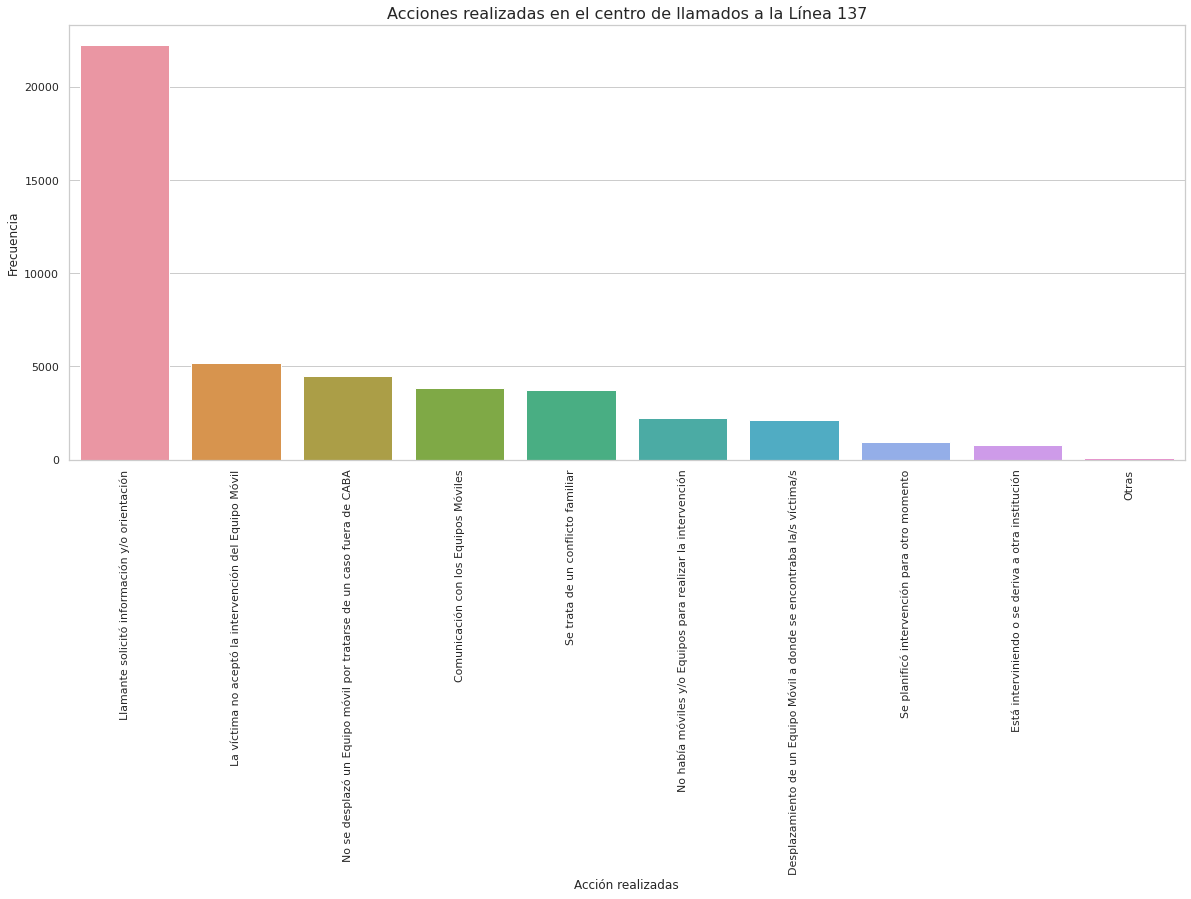

In [45]:
fig = plt.figure(figsize=(20, 8))
sns.set_theme(style="whitegrid", palette="Set2")
sns.countplot(
    data=linea137_df,
    x="llamado_derivacion",
    order=linea137_df["llamado_derivacion"].value_counts().index,
)

plt.xlabel("Acción realizadas", size=12)
plt.ylabel("Frecuencia", size=12)
plt.title("Acciones realizadas en el centro de llamados a la Línea 137", size=16)
plt.xticks(rotation=90)
plt.show()


In [46]:
print(
    "De las",
    len(linea137_df),
    "llamadas totales: \n-",
    round(
        len(
            linea137_df[
                linea137_df["llamado_derivacion"]
                == "Llamante solicitó información y/o orientación"
            ]
        )
        / len(linea137_df)
        * 100,
        2,
    ),
    "% fueron sólo para pedir información u orientación, sin generar ninguna acción por parte del personal del 137 o policial.\n- Por otro lado,",
    len(
        linea137_df[
            linea137_df["llamado_derivacion"]
            == "La víctima no aceptó la intervención del Equipo Móvil"
        ]
    ),
    "llamantes, es decir",
    round(
        len(
            linea137_df[
                linea137_df["llamado_derivacion"]
                == "La víctima no aceptó la intervención del Equipo Móvil"
            ]
        )
        / len(linea137_df)
        * 100,
        2,
    ),
    "%, no aceptan la intervención, aunque se haya considerado necesaria.",
)



De las 45583 llamadas totales: 
- 48.77 % fueron sólo para pedir información u orientación, sin generar ninguna acción por parte del personal del 137 o policial.
- Por otro lado, 5177 llamantes, es decir 11.36 %, no aceptan la intervención, aunque se haya considerado necesaria.


>**Observación:**
>
>- En la gran mayoría de los casos no se genera ninguna acción concreta luego de la llamada, sino el llamante sólo pide información y/o orientación respecto a alguna determinada situación.
>- Luego, hay varios casos en los que se solicita algún tipo de intervención, o en los que se sugiere intervención pero la víctima no lo acepta.

<html>
<hr>
  <h1 align="center";>
  Variable Aleatoria Numéricas
  </h1>
<hr>
</html>

<html>
  <h1 align="center";>
  1. Análisis columna <code>victima_cantidad</code> 
  </h1>
</html>

Describe el número de víctimas involucradas en el caso

#### Primero vemos qué valores están tomando cada una de las variables.

In [47]:
linea137_df["victima_cantidad"].describe().round(2)


count    45583.00
mean         1.37
std          1.19
min          0.00
25%          1.00
50%          1.00
75%          2.00
max         13.00
Name: victima_cantidad, dtype: float64

In [48]:
linea137_df["victima_cantidad"].value_counts()


1     23498
0      8130
2      7178
3      4078
4      1688
5       603
6       241
7        91
8        41
9        14
10       13
11        4
13        2
12        2
Name: victima_cantidad, dtype: int64

La **Media** y **Mediana**:




In [49]:
print('La media de victima_cantidad es de: ', round(linea137_df["victima_cantidad"].mean(),4))
print('La mediana de victima_cantidad es de: ', linea137_df["victima_cantidad"].median())
print("El % de victima_cantidad, en donde el valor es 0, es de:", round(len(df[df['victima_cantidad']==0])/len(df)*100,2), " %")

La media de victima_cantidad es de:  1.3737
La mediana de victima_cantidad es de:  1.0
El % de victima_cantidad, en donde el valor es 0, es de: 17.86  %


Graficamos el **histograma** de frecuencia con media y mediana indicada.

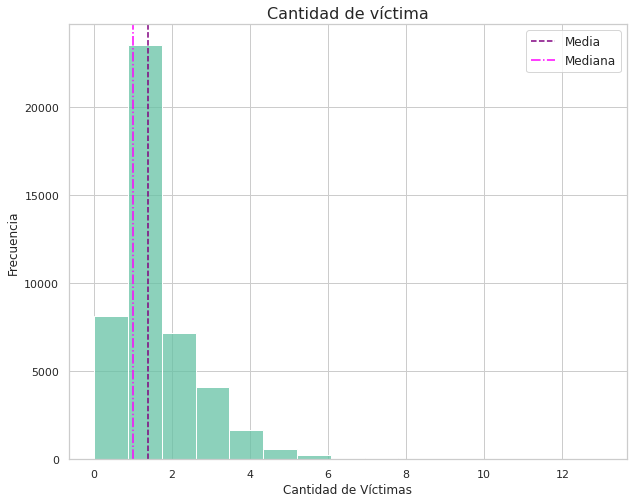

In [50]:
fig = plt.figure(figsize=(10, 8))

sns.histplot(linea137_df["victima_cantidad"], bins=15, palette="Set2")

plt.axvline(
    x=linea137_df.victima_cantidad.mean(),
    linestyle="--",
    color="purple",
    label="Media"
)

plt.axvline(
    x=linea137_df.victima_cantidad.median(),
    linestyle="-.",
    color="magenta",
    label="Mediana",
)
plt.legend(prop={"size": "medium"})
plt.xlabel("Cantidad de Víctimas", size=12)
plt.ylabel("Frecuencia", size=12)
plt.title("Cantidad de víctima", size=16)
plt.ticklabel_format(axis="y", style="plain", scilimits=(-3, 3), useOffset=False)
plt.show()


Observamos la relación entre la **cantidad de víctima** es igual a 0, la **cantidad de agresor** es 0 y si el tipo de violencia **no es caso de violencia**.

In [51]:
linea137_df[
    (linea137_df["victima_cantidad"] == 0)
    & (linea137_df["tipo_violencia_No-Aplica"] == 1)
    & (linea137_df["agresor_cantidad"] == 0)
]


,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha,llamado_hora,tipo_violencia_Económica,tipo_violencia_Física,tipo_violencia_No-Aplica,tipo_violencia_Otras,tipo_violencia_Psicológica,tipo_violencia_Sexual
18,291444.0,Otra/o particular,Femenino,No hay niñas/os,No aplica,NS/NC,0,0,NS/NC,NS/NC,Se trata de un conflicto familiar,2017-01-01,13:35,0,0,1,0,0,0
29,344577.0,Otra/o particular,Femenino,Sin datos,No aplica,NS/NC,0,0,NS/NC,NS/NC,Se trata de un conflicto familiar,2017-01-01,19:33,0,0,1,0,0,0
33,344579.0,Profesionales de la línea 137,NS/NC,Sin datos,No aplica,NS/NC,0,0,NS/NC,NS/NC,Comunicación con los Equipos Móviles,2017-01-01,22:26,0,0,1,0,0,0
44,322944.0,Profesionales de la línea 137,NS/NC,Sin datos,No aplica,NS/NC,0,0,NS/NC,NS/NC,Comunicación con los Equipos Móviles,2017-01-02,8:33,0,0,1,0,0,0
45,344528.0,Profesionales de la línea 137,NS/NC,Sin datos,No aplica,NS/NC,0,0,NS/NC,NS/NC,Comunicación con los Equipos Móviles,2017-01-02,8:39,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45577,443712.0,Otra/o particular,NS/NC,Sin datos,No aplica,NS/NC,0,0,NS/NC,NS/NC,Se trata de un conflicto familiar,2022-02-28,17:21,0,0,1,0,0,0
45579,443714.0,Otra/o particular,NS/NC,Sin datos,No aplica,NS/NC,0,0,NS/NC,NS/NC,Se trata de un conflicto familiar,2022-02-28,17:57,0,0,1,0,0,0
45580,443715.0,Otra/o particular,NS/NC,Sin datos,No aplica,NS/NC,0,0,NS/NC,NS/NC,Se trata de un conflicto familiar,2022-02-28,18:49,0,0,1,0,0,0
45581,443716.0,Otra/o particular,Femenino,Sin datos,No aplica,NS/NC,0,0,NS/NC,NS/NC,Se trata de un conflicto familiar,2022-02-28,18:52,0,0,1,0,0,0


Eliminamos estos datos ya que al no existir un tipo de violencia, no nos brinda información relevante para el análisis.

In [52]:
drop_cv = linea137_df[
    (linea137_df["victima_cantidad"] == 0)
    & (linea137_df["tipo_violencia_No-Aplica"] == 1)
    & (linea137_df["agresor_cantidad"] == 0)
].index

linea_137 = linea137_df.drop(drop_cv, inplace=True)



Observamos que para cuando hay algún tipo de violencia, hay casos donde la cantidad de víctima y cantidad de agresor es 0

In [53]:
linea137_df[
    (linea137_df["victima_cantidad"] == 0)
    & (linea137_df["tipo_violencia_No-Aplica"] == 0)
]


,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha,llamado_hora,tipo_violencia_Económica,tipo_violencia_Física,tipo_violencia_No-Aplica,tipo_violencia_Otras,tipo_violencia_Psicológica,tipo_violencia_Sexual
91,344616.0,Vecina/o,Femenino,Sin datos,Física y psicológica,NS/NC,0,0,NS/NC,NS/NC,No se desplazó un Equipo móvil por tratarse de...,2017-01-03,0:08,0,1,0,0,1,0
233,344672.0,Víctima,Masculino,Otro/a no Familiar,Física y psicológica,NS/NC,0,1,Femenino,Madre,No había móviles y/o Equipos para realizar la ...,2017-01-04,19:26,0,1,0,0,1,0
497,102586.0,Víctima,NS/NC,Sin datos,Física y psicológica,NS/NC,0,0,NS/NC,Ex pareja,Llamante solicitó información y/o orientación,2017-01-12,6:51,0,1,0,0,1,0
596,344914.0,Comisaría,Femenino,Otro/a no Familiar,Física y psicológica,NS/NC,0,0,NS/NC,Ex pareja,Llamante solicitó información y/o orientación,2017-01-14,15:05,0,1,0,0,1,0
696,344987.0,Vecina/o,Femenino,Otro/a no Familiar,Física y psicológica,NS/NC,0,1,Femenino,Madre,No se desplazó un Equipo móvil por tratarse de...,2017-01-17,10:20,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45447,443600.0,NS/NC,NS/NC,Sin datos,Psicológica,NS/NC,0,0,NS/NC,NS/NC,Llamante solicitó información y/o orientación,2022-02-23,18:13,0,0,0,0,1,0
45502,443650.0,Familiar,Femenino,No hay niñas/os,Psicológica,NS/NC,0,0,NS/NC,NS/NC,Llamante solicitó información y/o orientación,2022-02-25,11:40,0,0,0,0,1,0
45503,441876.0,NS/NC,NS/NC,Sin datos,Psicológica,NS/NC,0,0,NS/NC,NS/NC,No se desplazó un Equipo móvil por tratarse de...,2022-02-25,12:11,0,0,0,0,1,0
45505,443653.0,Vecina/o,NS/NC,No hay niñas/os,Física y psicológica,NS/NC,0,1,Femenino,Madre,No se desplazó un Equipo móvil por tratarse de...,2022-02-25,15:49,0,1,0,0,1,0


En este caso, al existir un caso de violencia la cantidad de victimas el reasignamos a 1.

In [54]:
linea137_df["victima_cantidad"] = linea137_df["victima_cantidad"].replace({0: 1})


In [55]:
linea137_df

,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha,llamado_hora,tipo_violencia_Económica,tipo_violencia_Física,tipo_violencia_No-Aplica,tipo_violencia_Otras,tipo_violencia_Psicológica,tipo_violencia_Sexual
0,344552.0,Comisaría,Masculino,Otro/a no Familiar,Física y psicológica,Femenino,3,1,Masculino,Pareja,La víctima no aceptó la intervención del Equip...,2017-01-01,1:37,0,1,0,0,1,0
1,344553.0,Comisaría,Femenino,Sin datos,Física y psicológica,Femenino,2,1,Masculino,Hermano/a,Llamante solicitó información y/o orientación,2017-01-01,6:42,0,1,0,0,1,0
2,344554.0,Víctima,Femenino,Madre,Física y psicológica,Femenino,1,1,Masculino,Pareja,Llamante solicitó información y/o orientación,2017-01-01,6:48,0,1,0,0,1,0
3,344555.0,Víctima,Femenino,No hay niñas/os,Física y psicológica,Femenino,1,1,Masculino,Pareja,Llamante solicitó información y/o orientación,2017-01-01,6:54,0,1,0,0,1,0
4,344556.0,Comisaría,Masculino,Otro/a no Familiar,Psicológica,Masculino,1,1,Femenino,Madre,Llamante solicitó información y/o orientación,2017-01-01,7:11,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45572,443708.0,Vecina/o,Femenino,Otro/a no Familiar,Física y psicológica,Masculino,1,1,Femenino,Madre,Llamante solicitó información y/o orientación,2022-02-28,11:57,0,1,0,0,1,0
45574,443709.0,Víctima,NS/NC,Sin datos,Física y psicológica,NS/NC,1,2,Masculino,Padre,No se desplazó un Equipo móvil por tratarse de...,2022-02-28,13:08,0,1,0,0,1,0
45575,443710.0,Víctima,Femenino,No hay niñas/os,Física y psicológica,Femenino,1,1,Masculino,Hijo/a,Llamante solicitó información y/o orientación,2022-02-28,13:30,0,1,0,0,1,0
45576,443711.0,Familiar,Femenino,No hay niñas/os,Física y psicológica,Femenino,1,1,Masculino,Pareja,Llamante solicitó información y/o orientación,2022-02-28,13:36,0,1,0,0,1,0


In [56]:
print('La media de victima_cantidad es de: ', round(linea137_df["victima_cantidad"].mean(),4))
print('La mediana de victima_cantidad es de: ', linea137_df["victima_cantidad"].median())
print("El % de victima_cantidad, en donde el valor es 0, es de:", round(len(linea137_df[linea137_df['victima_cantidad']==0])/len(df)*100,2), " %")

La media de victima_cantidad es de:  1.6631
La mediana de victima_cantidad es de:  1.0
El % de victima_cantidad, en donde el valor es 0, es de: 0.0  %


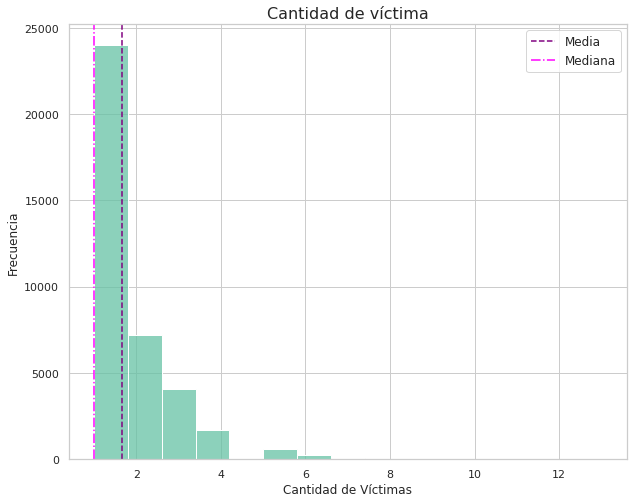

In [57]:
fig = plt.figure(figsize=(10, 8))

sns.histplot(linea137_df["victima_cantidad"], bins=15, palette="Set2")

plt.axvline(
    x=linea137_df.victima_cantidad.mean(),
    linestyle="--",
    color="purple",
    label="Media"
)

plt.axvline(
    x=linea137_df.victima_cantidad.median(),
    linestyle="-.",
    color="magenta",
    label="Mediana",
)
plt.legend(prop={"size": "medium"})
plt.xlabel("Cantidad de Víctimas", size=12)
plt.ylabel("Frecuencia", size=12)
plt.title("Cantidad de víctima", size=16)
plt.ticklabel_format(axis="y", style="plain", scilimits=(-3, 3), useOffset=False)
plt.show()



In [58]:
linea137_df[(linea137_df['victima_cantidad']>=10) & (linea137_df["tipo_violencia_No-Aplica"]==0)]

,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha,llamado_hora,tipo_violencia_Económica,tipo_violencia_Física,tipo_violencia_No-Aplica,tipo_violencia_Otras,tipo_violencia_Psicológica,tipo_violencia_Sexual
746,345021.0,Víctima,Femenino,Otro/a Familiar,Física y psicológica,NS/NC,10,1,Masculino,Padre,Llamante solicitó información y/o orientación,2017-01-18,12:31,0,1,0,0,1,0
6830,348114.0,Otra/o particular,Femenino,Otro/a no Familiar,Física y psicológica,Femenino,10,1,Masculino,Ex pareja,Llamante solicitó información y/o orientación,2017-08-17,14:58,0,1,0,0,1,0
7906,359760.0,Comisaría,Femenino,Otro/a no Familiar,Física y psicológica,Femenino,11,1,Masculino,Hermano/a,Se planificó intervención para otro momento,2017-09-29,19:02,0,1,0,0,1,0
8555,360218.0,Comisaría,Femenino,No hay niñas/os,Física y psicológica,Femenino,10,1,Masculino,Otro/a no conviviente,La víctima no aceptó la intervención del Equip...,2017-10-26,22:26,0,1,0,0,1,0
9446,347672.0,Comisaría,Masculino,Otro/a no Familiar,Física y psicológica,Femenino,10,1,Masculino,Pareja,La víctima no aceptó la intervención del Equip...,2017-12-06,20:07,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38212,435842.0,Familiar,Femenino,Otro/a Familiar,Física y psicológica,Femenino,13,2,Masculino,Pareja,Llamante solicitó información y/o orientación,2021-05-11,18:29,0,1,0,0,1,0
38940,436632.0,Víctima,Femenino,Madre,Psicológica,Femenino,12,1,Femenino,Hijo/a,Llamante solicitó información y/o orientación,2021-06-11,3:43,0,0,0,0,1,0
42770,440809.0,Vecina/o,Femenino,Otro/a no Familiar,Física y psicológica,NS/NC,11,5,NS/NC,NS/NC,Llamante solicitó información y/o orientación,2021-11-05,0:42,0,1,0,0,1,0
43076,441196.0,Comisaría,Masculino,Otro/a no Familiar,Física y psicológica,Femenino,10,1,Masculino,Pareja,La víctima no aceptó la intervención del Equip...,2021-11-16,19:09,0,1,0,0,1,0


Reemplazamos la cantidad de víctima mayores a **10** a **1** ya que no tienen relación a la columna `agresor_relación_victima` y `llamante_vinculo_ninios_presentes`. Puede ser que por error de tipeo existan estos outliers.

In [59]:
linea137_df["victima_cantidad"] = linea137_df["victima_cantidad"].replace(
    {10: 1, 11: 1, 12 : 1, 13: 1}
)


In [60]:
linea137_df["victima_cantidad"].value_counts(normalize=True)*100

1    63.283267
2    18.914361
3    10.745718
4     4.447958
5     1.588933
6     0.635046
7     0.239789
8     0.108037
9     0.036891
Name: victima_cantidad, dtype: float64

>**Observación:**
>
>- En la gran mayoría de los casos, la víctima es una sola.

<html>
  <h1 align="center";>
  10. Análisis columna <code>agresor_cantidad</code>    
  </h1>
</html>

Describe el número de agresores involucrados en el caso

#### Primero vemos qué valores están tomando cada una de las variables.

In [61]:
linea137_df["agresor_cantidad"].describe().round(2)


count    37950.00
mean         1.06
std          0.43
min          0.00
25%          1.00
50%          1.00
75%          1.00
max         51.00
Name: agresor_cantidad, dtype: float64

In [62]:
linea137_df["agresor_cantidad"].value_counts()


1     34757
2      2254
0       637
3       226
4        58
5        15
51        1
7         1
6         1
Name: agresor_cantidad, dtype: int64

La **Media** y **Mediana**:




In [63]:
print('La media de victima_cantidad es de: ', round(linea137_df["agresor_cantidad"].mean(),4))
print('La mediana de victima_cantidad es de: ', linea137_df["agresor_cantidad"].median())
print("El % de victima_cantidad, en donde el valor es 0, es de:", round(len(linea137_df[linea137_df['agresor_cantidad']==0])/len(linea137_df)*100,2), " %")

La media de victima_cantidad es de:  1.0623
La mediana de victima_cantidad es de:  1.0
El % de victima_cantidad, en donde el valor es 0, es de: 1.68  %


Graficamos el **histograma** de frecuencia con media y mediana indicada.

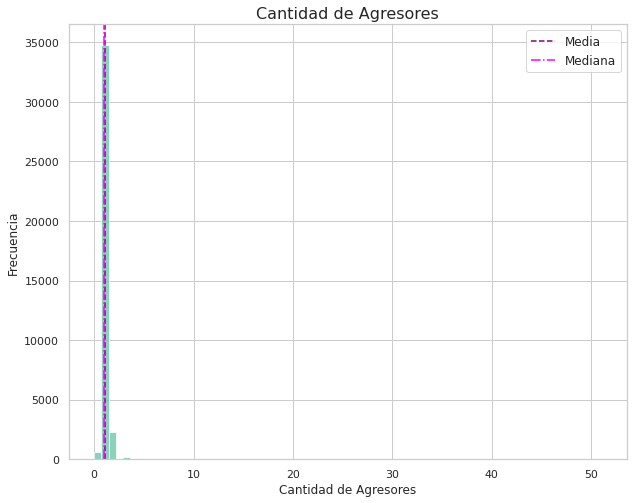

In [64]:
fig = plt.figure(figsize=(10, 8))

sns.histplot(linea137_df["agresor_cantidad"], bins=70, palette="Set2")

plt.axvline(
    x=linea137_df.agresor_cantidad.mean(),
    linestyle="--",
    color="purple",
    label="Media"
)

plt.axvline(
    x=linea137_df.agresor_cantidad.median(),
    linestyle="-.",
    color="magenta",
    label="Mediana",
)
plt.legend(prop={"size": "medium"})
plt.xlabel("Cantidad de Agresores", size=12)
plt.ylabel("Frecuencia", size=12)
plt.title("Cantidad de Agresores", size=16)
plt.ticklabel_format(axis="y", style="plain", scilimits=(-3, 3), useOffset=False)
plt.show()



Observamos la relación entre la **cantidad de agresor** es igual a 0, la y si el **no es caso de violencia**.

In [65]:
linea137_df[(linea137_df['agresor_cantidad']==0) & (linea137_df["tipo_violencia_No-Aplica"]==1)]

,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha,llamado_hora,tipo_violencia_Económica,tipo_violencia_Física,tipo_violencia_No-Aplica,tipo_violencia_Otras,tipo_violencia_Psicológica,tipo_violencia_Sexual
31230,427651.0,Profesionales de la línea 137,NS/NC,Sin datos,No aplica,Femenino,1,0,NS/NC,Abuelo/a,Desplazamiento de un Equipo Móvil a donde se e...,2020-08-27,8:15,0,0,1,0,0,0
31581,360725.0,Familiar,Masculino,Padre,No aplica,Masculino,1,0,Masculino,Otro/a no conviviente,Llamante solicitó información y/o orientación,2020-09-08,23:00,0,0,1,0,0,0
43116,441254.0,Familiar,Femenino,Madre,No Aplica,Masculino,1,0,Masculino,Padre,Se trata de un conflicto familiar,2021-11-18,17:50,0,0,1,0,0,0


Eliminamos estos datos ya que son muy pocos.

In [66]:
drop_ca = linea137_df[(linea137_df["tipo_violencia_No-Aplica"]==1) & (linea137_df["agresor_cantidad"]==0)].index;
drop_ca
linea_137 = linea137_df.drop(drop_ca, inplace=True)


Observamos que para cuando hay **tipo de violencia** y **cantidad de agresor** es 0

In [67]:
linea137_df[(linea137_df['agresor_cantidad']==0) & (linea137_df["tipo_violencia_No-Aplica"]==0)]

,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha,llamado_hora,tipo_violencia_Económica,tipo_violencia_Física,tipo_violencia_No-Aplica,tipo_violencia_Otras,tipo_violencia_Psicológica,tipo_violencia_Sexual
40,216350.0,Comisaría,Femenino,Sin datos,Física y psicológica,NS/NC,2,0,Masculino,Ex pareja,Desplazamiento de un Equipo Móvil a donde se e...,2017-01-02,1:31,0,1,0,0,1,0
91,344616.0,Vecina/o,Femenino,Sin datos,Física y psicológica,NS/NC,1,0,NS/NC,NS/NC,No se desplazó un Equipo móvil por tratarse de...,2017-01-03,0:08,0,1,0,0,1,0
186,432154.0,Familiar,Masculino,Padre,Psicológica,Masculino,2,0,NS/NC,NS/NC,Llamante solicitó información y/o orientación,2021-01-03,18:11,0,0,0,0,1,0
287,102453.0,Víctima,Femenino,Madre,Física y psicológica,Femenino,1,0,Masculino,Pareja,Desplazamiento de un Equipo Móvil a donde se e...,2017-01-06,9:41,0,1,0,0,1,0
304,344713.0,Víctima,Femenino,No hay niñas/os,Psicológica,Femenino,1,0,NS/NC,Hijo/a,Llamante solicitó información y/o orientación,2017-01-06,18:39,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45447,443600.0,NS/NC,NS/NC,Sin datos,Psicológica,NS/NC,1,0,NS/NC,NS/NC,Llamante solicitó información y/o orientación,2022-02-23,18:13,0,0,0,0,1,0
45502,443650.0,Familiar,Femenino,No hay niñas/os,Psicológica,NS/NC,1,0,NS/NC,NS/NC,Llamante solicitó información y/o orientación,2022-02-25,11:40,0,0,0,0,1,0
45503,441876.0,NS/NC,NS/NC,Sin datos,Psicológica,NS/NC,1,0,NS/NC,NS/NC,No se desplazó un Equipo móvil por tratarse de...,2022-02-25,12:11,0,0,0,0,1,0
45504,443651.0,Vecina/o,Femenino,Otro/a no Familiar,"Física, sexual y psicológica",NS/NC,2,0,Masculino,Padre,No se desplazó un Equipo móvil por tratarse de...,2022-02-25,15:08,0,1,0,0,1,1


En este caso, al existir un caso de tipo de violencia a la cantidad de agresores le reasignamos a 1.

In [68]:
linea137_df["agresor_cantidad"] = linea137_df["agresor_cantidad"].replace(
    {0: 1}
)


Tambien observamos que hay datos mayores a 5 de cantidad de agresor, que consideramos como **outliers**

In [69]:
linea137_df[(linea137_df['agresor_cantidad']>5) & (linea137_df["tipo_violencia_No-Aplica"]==0)]

,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha,llamado_hora,tipo_violencia_Económica,tipo_violencia_Física,tipo_violencia_No-Aplica,tipo_violencia_Otras,tipo_violencia_Psicológica,tipo_violencia_Sexual
34704,431905.0,Familiar,Masculino,No hay niñas/os,Física y psicológica,Femenino,1,51,Femenino,Hijo/a,No se desplazó un Equipo móvil por tratarse de...,2020-12-25,16:00,0,1,0,0,1,0
37109,434658.0,Víctima,Femenino,No hay niñas/os,Física y psicológica,Femenino,2,7,Femenino,Otro/a no conviviente,Llamante solicitó información y/o orientación,2021-03-29,15:45,0,1,0,0,1,0
40382,438292.0,Víctima,Femenino,Madre,Física y psicológica,Femenino,1,6,Femenino,Madre,Llamante solicitó información y/o orientación,2021-08-06,18:10,0,1,0,0,1,0


Lo **unificamos** y le reasignamos como **un caso** a cada uno ya que la relación con la variable `agresor_relacion_victima` y `llamada_derivacion` no nos aporta mucha información para que la cantidad de agresores sean de esa cantidad.

In [70]:
linea137_df["agresor_cantidad"] = linea137_df["agresor_cantidad"].replace(
    {6: 1, 7: 1, 51: 1}
)


In [71]:
linea137_df

,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha,llamado_hora,tipo_violencia_Económica,tipo_violencia_Física,tipo_violencia_No-Aplica,tipo_violencia_Otras,tipo_violencia_Psicológica,tipo_violencia_Sexual
0,344552.0,Comisaría,Masculino,Otro/a no Familiar,Física y psicológica,Femenino,3,1,Masculino,Pareja,La víctima no aceptó la intervención del Equip...,2017-01-01,1:37,0,1,0,0,1,0
1,344553.0,Comisaría,Femenino,Sin datos,Física y psicológica,Femenino,2,1,Masculino,Hermano/a,Llamante solicitó información y/o orientación,2017-01-01,6:42,0,1,0,0,1,0
2,344554.0,Víctima,Femenino,Madre,Física y psicológica,Femenino,1,1,Masculino,Pareja,Llamante solicitó información y/o orientación,2017-01-01,6:48,0,1,0,0,1,0
3,344555.0,Víctima,Femenino,No hay niñas/os,Física y psicológica,Femenino,1,1,Masculino,Pareja,Llamante solicitó información y/o orientación,2017-01-01,6:54,0,1,0,0,1,0
4,344556.0,Comisaría,Masculino,Otro/a no Familiar,Psicológica,Masculino,1,1,Femenino,Madre,Llamante solicitó información y/o orientación,2017-01-01,7:11,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45572,443708.0,Vecina/o,Femenino,Otro/a no Familiar,Física y psicológica,Masculino,1,1,Femenino,Madre,Llamante solicitó información y/o orientación,2022-02-28,11:57,0,1,0,0,1,0
45574,443709.0,Víctima,NS/NC,Sin datos,Física y psicológica,NS/NC,1,2,Masculino,Padre,No se desplazó un Equipo móvil por tratarse de...,2022-02-28,13:08,0,1,0,0,1,0
45575,443710.0,Víctima,Femenino,No hay niñas/os,Física y psicológica,Femenino,1,1,Masculino,Hijo/a,Llamante solicitó información y/o orientación,2022-02-28,13:30,0,1,0,0,1,0
45576,443711.0,Familiar,Femenino,No hay niñas/os,Física y psicológica,Femenino,1,1,Masculino,Pareja,Llamante solicitó información y/o orientación,2022-02-28,13:36,0,1,0,0,1,0


La **Media** y **Mediana**:




In [72]:
print('La media de victima_cantidad es de: ', round(linea137_df["agresor_cantidad"].mean(),4))
print('La mediana de victima_cantidad es de: ', linea137_df["agresor_cantidad"].median())
print("El % de victima_cantidad, en donde el valor es 0, es de:", round(len(linea137_df[linea137_df['agresor_cantidad']==0])/len(linea137_df)*100,2), " %")

La media de victima_cantidad es de:  1.0775
La mediana de victima_cantidad es de:  1.0
El % de victima_cantidad, en donde el valor es 0, es de: 0.0  %


Graficamos el **histograma** de frecuencia con media y mediana indicada.

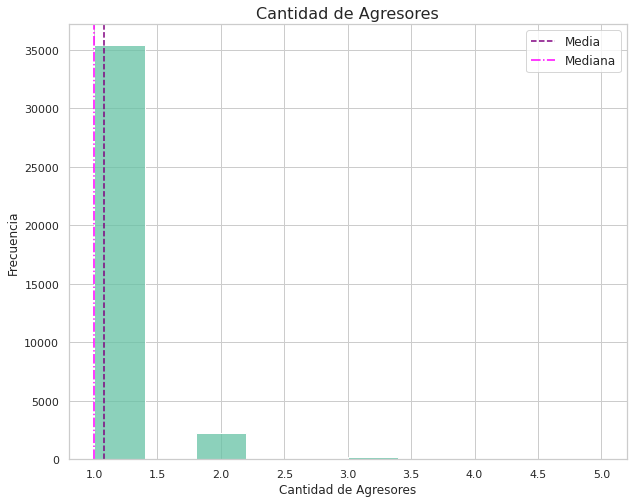

In [73]:
fig = plt.figure(figsize=(10, 8))

sns.histplot(linea137_df["agresor_cantidad"], bins=10, palette="Set2")

plt.axvline(
    x=linea137_df.agresor_cantidad.mean(),
    linestyle="--",
    color="purple",
    label="Media"
)

plt.axvline(
    x=linea137_df.agresor_cantidad.median(),
    linestyle="-.",
    color="magenta",
    label="Mediana",
)

plt.legend(prop={"size": "medium"})
plt.xlabel("Cantidad de Agresores", size=12)
plt.ylabel("Frecuencia", size=12)
plt.title("Cantidad de Agresores", size=16)
plt.ticklabel_format(axis="y", style="plain", scilimits=(-3, 3), useOffset=False)
plt.show()



**Observación:**
>- En la gran mayoría de los casos el agresor es uno solo.

<html>
<hr>
  <h1 align="center";>
  Variables Temporales
  </h1>
<hr>
</html>

<html>
  <h1 align="center";>
  1. Análisis columna <code>llamado_fecha</code> y <code> llamado_hora </code>
  </h1>
</html>

Fecha y hora en la que se realiza el llamado

In [74]:
linea137_df.dtypes

caso_id                              float64
llamante_descripcion                  object
llamante_genero                       object
llamante_vinculo_ninios_presentes     object
violencia_tipo                        object
victima_genero                        object
victima_cantidad                       int64
agresor_cantidad                       int64
agresor_genero                        object
agresor_relacion_victima              object
llamado_derivacion                    object
llamado_fecha                         object
llamado_hora                          object
tipo_violencia_Económica               uint8
tipo_violencia_Física                  uint8
tipo_violencia_No-Aplica               uint8
tipo_violencia_Otras                   uint8
tipo_violencia_Psicológica             uint8
tipo_violencia_Sexual                  uint8
dtype: object

Como se observo, las columnas `llamado_fecha` y `llamado_hora` son tipo `object`, se procederá a cambiar el tipo de datos.

In [75]:
linea137_df["fecha_y_hora"] = linea137_df.llamado_fecha + " " + linea137_df.llamado_hora
linea137_df["fecha_y_hora"] = pd.to_datetime(
    linea137_df["fecha_y_hora"], format="%Y-%m-%d %H:%M:%S"
)
linea137_df.fecha_y_hora.head()


0   2017-01-01 01:37:00
1   2017-01-01 06:42:00
2   2017-01-01 06:48:00
3   2017-01-01 06:54:00
4   2017-01-01 07:11:00
Name: fecha_y_hora, dtype: datetime64[ns]

Verificamos si las fechas obtienen su formato correspondiente

In [76]:
linea137_df.dtypes


caso_id                                     float64
llamante_descripcion                         object
llamante_genero                              object
llamante_vinculo_ninios_presentes            object
violencia_tipo                               object
victima_genero                               object
victima_cantidad                              int64
agresor_cantidad                              int64
agresor_genero                               object
agresor_relacion_victima                     object
llamado_derivacion                           object
llamado_fecha                                object
llamado_hora                                 object
tipo_violencia_Económica                      uint8
tipo_violencia_Física                         uint8
tipo_violencia_No-Aplica                      uint8
tipo_violencia_Otras                          uint8
tipo_violencia_Psicológica                    uint8
tipo_violencia_Sexual                         uint8
fecha_y_hora


<html>
<hr>
  <h1 align="center";>
  Relaciones relevantes
  </h1>
  <hr>
</html>

Luego de analizar las variables de manera individual para conocer un poco mas los datos, nos interesa explorar las relaciones entre:

  a. **Género víctima** versus **Género agresor**

  b. **Llamante** y **derivación** de la llamada

  c. **Cantidad de víctimas** versus **Cantidad de agresores**

  d. ¿Existieron **días**, o **periodos** sin llamadas? con llamadas mínimas?

  e. ¿Existen **tendencias** a la estacionariedad?

  f. ¿Cuáles son las **fechas y horas** que se dieron como pico?

  g. ¿Cuáles son las **fechas y horas** que se darán como pico a futuro?

<html>
  <h1 align="center";>
  a. Género Víctima vs Género Agresor
  </h1>
</html>

#### Creamos una tabla de contingencia entre **genero víctima** y **género agresor**

In [77]:
tabla_contingencia = pd.crosstab(
    linea137_df.agresor_genero, linea137_df.victima_genero
)
tabla_contingencia


victima_genero,Femenino,Masculino,NS/NC,Transgénero
agresor_genero,,,,
Femenino,4201,2248,420,14
Masculino,25014,2245,638,35
NS/NC,1125,383,1606,4
Transgénero,7,3,1,3


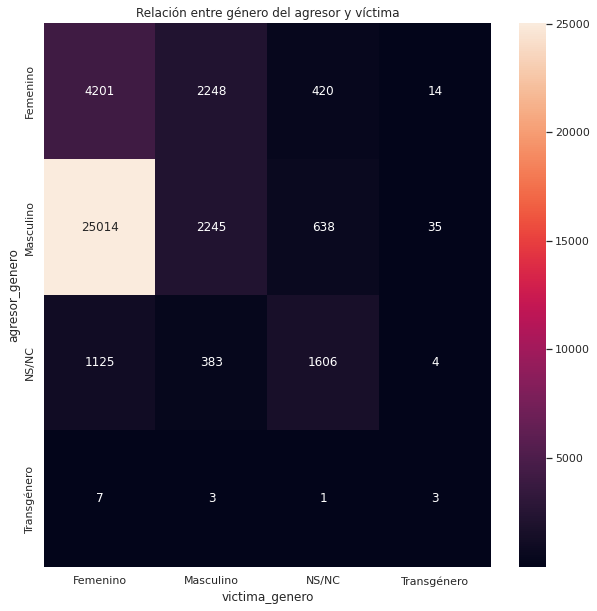

In [78]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(tabla_contingencia, annot=True, fmt="g")
plt.title("Relación entre género del agresor y víctima")
plt.show()


>**Observación:**
>
> Se observa que en la gran mayoría de los casos, la víctima es femenina y el agresor masculino.

<html>
  <h1 align="center";>
  b. Llamante y derivación de la llamada
  </h1>
</html>

#### Analizamos el llamante de género y su derivación.

Con **crosstab** calcula una tabla de frecuencia de las columnas `llamado_derivacion` y `llamante_genero`

In [79]:
gen = pd.crosstab(linea137_df["llamado_derivacion"],
                  linea137_df["llamante_genero"])
gen


llamante_genero,Femenino,Masculino,NS/NC,Transgénero
llamado_derivacion,,,,
Comunicación con los Equipos Móviles,21,4,7,0
Desplazamiento de un Equipo Móvil a donde se encontraba la/s víctima/s,1459,562,49,0
Está interviniendo o se deriva a otra institución,608,162,8,0
La víctima no aceptó la intervención del Equipo Móvil,3308,1838,25,6
Llamante solicitó información y/o orientación,15552,4942,1710,13
No había móviles y/o Equipos para realizar la intervención,1489,743,14,0
No se desplazó un Equipo móvil por tratarse de un caso fuera de CABA,3584,831,65,4
Otras,3,1,1,0
Se planificó intervención para otro momento,653,261,10,0


Creamos un gráfico **heatmap** que nos compare las frecuencias de las dos columnas, donde el color de cada "cuadrante" será más oscuro donde hay mayor frecuencia de casos.

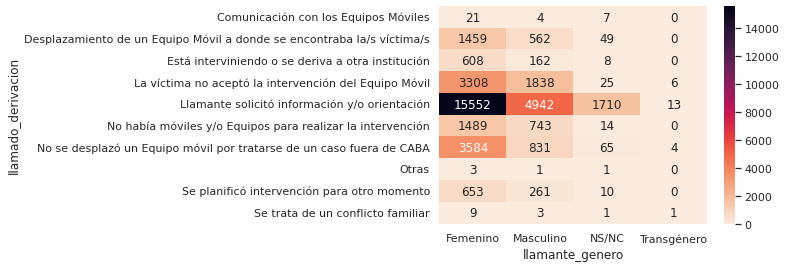

In [80]:
sns.heatmap(gen, annot=True, fmt="d", cmap="rocket_r");


Creamos una gráfica de conteo con  `catplot` que nos muestra el número de observaciones en cada categoría de su variable, en este caso el de `llamante_genero` y `llamado_derivación`. 

Para el gráfico de conteo, configuramos el parámetro kind para contar (`count`).

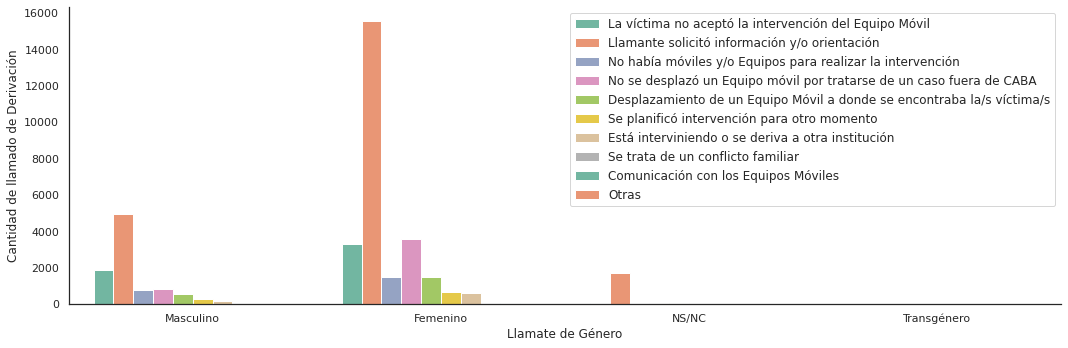

In [81]:
with sns.axes_style("white"):
    g = sns.catplot(
        x="llamante_genero",
        data=linea137_df,
        aspect=3.0,
        kind="count",
        palette="Set2",
        hue="llamado_derivacion",
        legend=False,
    )
    g.set_ylabels("Cantidad de llamado de Derivación")
    g.set_xlabels("Llamate de Género")
    plt.legend(loc="upper right", prop={"size": "medium"})
    sns.despine()
    plt.show()


En el gráfico anterior observamos los datos **NS/NC** y **Transgénero** de la columna `llamante_genero`  no se logra distinguir la relación con la columna `llamado_derivacion`.

Para ello, vamos a utilizar **crosstab** y **heatmap** para visualizar estas variables categóricas.

In [82]:
orden = ['Transgénero', 'NS/NC']
gen = pd.crosstab(linea137_df["llamado_derivacion"],
                  linea137_df["llamante_genero"])[orden]
gen


llamante_genero,Transgénero,NS/NC
llamado_derivacion,,
Comunicación con los Equipos Móviles,0,7
Desplazamiento de un Equipo Móvil a donde se encontraba la/s víctima/s,0,49
Está interviniendo o se deriva a otra institución,0,8
La víctima no aceptó la intervención del Equipo Móvil,6,25
Llamante solicitó información y/o orientación,13,1710
No había móviles y/o Equipos para realizar la intervención,0,14
No se desplazó un Equipo móvil por tratarse de un caso fuera de CABA,4,65
Otras,0,1
Se planificó intervención para otro momento,0,10


Creamos un gráfico que nos compare las frecuencias de las dos columnas  donde el color de cada "cuadrante" será más oscuro donde hay mayor frecuencia de casos.

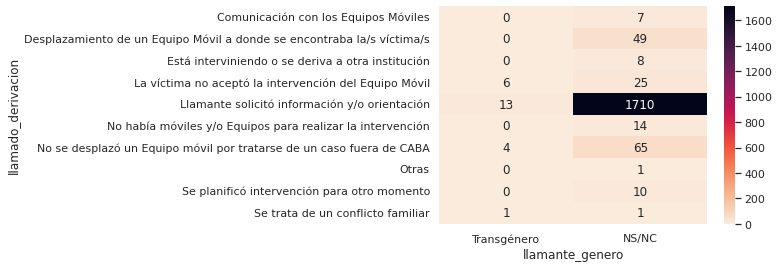

In [83]:
sns.heatmap(gen, annot=True, fmt="d", cmap="rocket_r");


Observamos que solamente personas de género Transgénero:
- 13 el/la llamante solicitó información y/o orientación
- 7 la llamada se trató de un conflicto familiar
- 4 no se desplazó un Equipo Móvil por tratarse de un caso fuera de CABA.

Para el caso de personas que respondieron como género **NS/NC**:
- La mayoría de los casos solicitó comunicación con los Equipos Móviles 
- El o la llamante solicitó información y/o orientación 
- Se trató de un conflicto familiar.


Por último, analizamos los dos datos con **mayor cantidad de frecuencia** y realizamos el gráfico con **heatmap** que nos compara las frecuencias de las dos columnas pero con los datos de llamante género **Femenino** y llamante género **Masculino**. 

El color de cada "cuadrante" será más oscuro donde hay mayor frecuencia de casos.

In [84]:
orden = ['Femenino', 'Masculino']
gen = pd.crosstab(linea137_df["llamado_derivacion"],
                  linea137_df["llamante_genero"])[orden]
gen 

llamante_genero,Femenino,Masculino
llamado_derivacion,,
Comunicación con los Equipos Móviles,21,4
Desplazamiento de un Equipo Móvil a donde se encontraba la/s víctima/s,1459,562
Está interviniendo o se deriva a otra institución,608,162
La víctima no aceptó la intervención del Equipo Móvil,3308,1838
Llamante solicitó información y/o orientación,15552,4942
No había móviles y/o Equipos para realizar la intervención,1489,743
No se desplazó un Equipo móvil por tratarse de un caso fuera de CABA,3584,831
Otras,3,1
Se planificó intervención para otro momento,653,261


Analizamos con el gráfico **heatmap** que nos compare las frecuencias de las dos columnas pero con los datos de llamante género **Femenino** y llamante género **Masculino** con relación a la derivación del llamado. 


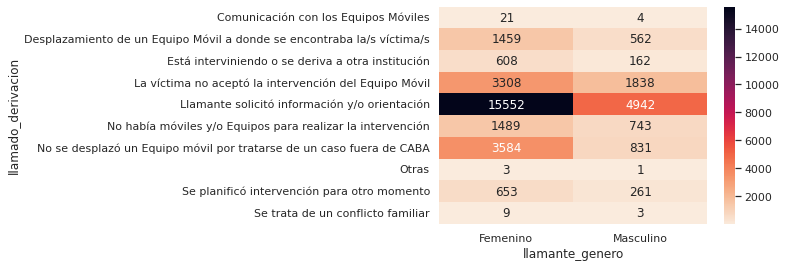

In [85]:
sns.heatmap(gen, annot=True, fmt="d", cmap="rocket_r");


>**Observación:**
>
>- La mayoría de las derivaciónes son realizadas por el género Femenino donde el mayor caso la llamante solicitó información y/o orientación. 
>- La mayoria de las llamadas realizadas por el género Masculino y Transgénero solicitó información y/o orientación.  

<html>
  <h1 align="center";>
  c. Cantidad de víctimas vs Cantidad de agresores
  </h1>
</html>

##### Para tener un pantallazo de los datos, vamos a calcular el rango de las variables.

Calcularemos el valor mínimo, el máximo, el rango, algunos percentiles, así como el rango intercuartílico para cada una de las variables.

Además, utilizaremos el método `unique()` para conocer los valores posibles de cada variable.

In [86]:
cols = ["victima_cantidad", "agresor_cantidad"]

ranges = pd.DataFrame()
ranges["min"] = linea137_df[cols].min()
ranges["max"] = linea137_df[cols].max()
ranges["std"] = linea137_df[cols].std()
ranges["range"] = ranges["max"] - ranges["min"]
ranges["q25"] = linea137_df[cols].quantile(0.25)
ranges["q50"] = linea137_df[cols].quantile(0.50)
ranges["q70"] = linea137_df[cols].quantile(0.70)
ranges["q75"] = linea137_df[cols].quantile(0.75)
ranges["range_intercuartil"] = ranges["q75"] - ranges["q25"]
ranges["count"] = linea137_df[cols].count()
ranges


,min,max,std,range,q25,q50,q70,q75,range_intercuartil,count
victima_cantidad,1,9,1.078267,8,1.0,1.0,2.0,2.0,1.0,37947
agresor_cantidad,1,5,0.311933,4,1.0,1.0,1.0,1.0,0.0,37947


Realizamos una Tabla de contingencia

In [87]:
tabla_contingencia1 = pd.crosstab(
    linea137_df.victima_cantidad, linea137_df.agresor_cantidad
)
tabla_contingencia1


agresor_cantidad,1,2,3,4,5
victima_cantidad,,,,,
1,22476,1354,135,38,10
2,6663,464,44,6,1
3,3790,260,21,6,1
4,1570,97,15,3,3
5,548,48,6,1,0
6,214,20,4,3,0
7,82,8,1,0,0
8,39,2,0,0,0
9,12,1,0,1,0


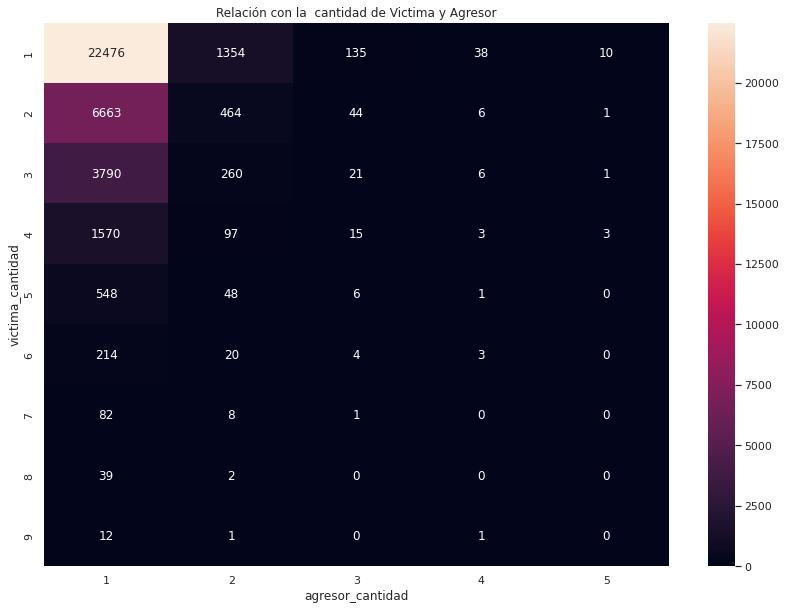

In [88]:
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(tabla_contingencia1, annot=True, fmt="g")
plt.title("Relación con la  cantidad de Victima y Agresor")
plt.show()


Hacemos un análisis de las víctimas y la fecha


In [89]:
print("Las primeras llamadas para cada género fueron hechas: ",linea137_df.groupby('victima_genero')['fecha_y_hora'].first())


Las primeras llamadas para cada género fueron hechas:  victima_genero
Femenino      2017-01-01 01:37:00
Masculino     2017-01-01 07:11:00
NS/NC         2017-01-01 17:38:00
Transgénero   2017-03-03 12:49:00
Name: fecha_y_hora, dtype: datetime64[ns]


>**Observación:**
>
>Se observa que para la cantidad  maxima de agresores, hubo un salto importante en el año 2021, además se puede ver que hay una mayor cantidad de victimas que de agresores.
>
>Se puede tener informacion de la media de la cantidad de victimas y agresores, que se corresponde con el cálculo del rango de valores que se realizó anteriormente

<html>
  <h1 align="center";>
  d. ¿Existieron días, o períodos sin llamadas? con llamadas mínimas?
  </h1>
</html>

Se observan las **medias** de la cantidad de victimas por año, excluyendo al año 2022 ya que contiene pocos meses.

In [90]:
linea137_df[linea137_df["fecha_y_hora"].dt.year != 2022].groupby(
    linea137_df.fecha_y_hora.dt.year
).victima_cantidad.sum()


fecha_y_hora
2017    14586
2018    11214
2019    10469
2020    12821
2021    12001
Name: victima_cantidad, dtype: int64

Para un análisis mas correcto, se agrupó la cantidad de llamados por fecha disponible y se obtuvo el total de llamadas realizadas para un mismo día. 

In [91]:
df_fecha = (
    linea137_df[linea137_df["fecha_y_hora"].dt.year != 2022]
    .groupby(["llamado_fecha"], as_index=False)
    .victima_cantidad.sum()
)
df_fecha


,llamado_fecha,victima_cantidad
0,2017-01-01,61
1,2017-01-02,87
2,2017-01-03,56
3,2017-01-04,74
4,2017-01-05,54
...,...,...
1819,2021-12-27,51
1820,2021-12-28,55
1821,2021-12-29,47
1822,2021-12-30,21


Corraboramos el tipo de datos

In [92]:
df_fecha["llamado_fecha"] = pd.to_datetime(df_fecha["llamado_fecha"], format="%Y-%m-%d")
df_fecha.dtypes


llamado_fecha       datetime64[ns]
victima_cantidad             int64
dtype: object

In [93]:
fig = px.scatter(
    df_fecha,
    title = "Cantidad de víctimas desde el 2017 al 2021",
    x = df_fecha.llamado_fecha,
    y = "victima_cantidad",
    color = df_fecha.llamado_fecha.dt.year,
)
fig.show()


Para el análisis, se procede a muestrear por cada semana, para cada año

In [94]:
linea137 = linea137_df.copy()
linea137["llamado_fecha"] = pd.to_datetime(linea137["llamado_fecha"], format="%Y-%m-%d")
linea137["semana"] = linea137["llamado_fecha"].dt.week
linea137["year"] = linea137["llamado_fecha"].dt.year
linea137 = linea137.groupby(["year", "semana"], as_index=False).victima_cantidad.sum()
linea137


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



,year,semana,victima_cantidad
0,2017,1,432
1,2017,2,372
2,2017,3,353
3,2017,4,333
4,2017,5,304
...,...,...,...
267,2022,6,237
268,2022,7,200
269,2022,8,201
270,2022,9,17


Se obtiene la cantidad mínima de llamadas, para determinadas semanas.

In [95]:
minimo = linea137["victima_cantidad"].min()
print(minimo, " es la cantidad de víctimas mínima")
linea137.loc[linea137["victima_cantidad"] == minimo]


17  es la cantidad de víctimas mínima


,year,semana,victima_cantidad
270,2022,9,17


In [96]:
fig = px.scatter(
    linea137,
    title = "Cantidad de víctimas",
    x = "semana",
    y = "victima_cantidad",
    color = "year",
    size='victima_cantidad',
)
fig.update_traces(marker_size=10)
fig.show()


>**Observación:**
>
>- Se observa que la cantidad mínima de llamadas fue de 17, y se dió en la **semana 9** del año **2022**, es decir que ocurrió entre los días del **21 al 27 de Febrero**.


<html>
  <h1 align="center";>
  e. ¿Existen tendencias a la estacionariedad?
  </h1>
</html>

Analizamos entre los años 2017 al 2021 para establecer una tendencia.

In [97]:
fig = px.line(
    linea137[linea137["year"] != 2022],
    x="semana", 
    y="victima_cantidad", 
    color="year",
    markers= True
    )
fig.update_traces(marker_size=10)
fig.update_layout(title='Tendencia Estancionariedad entre 2017 - 2021',
                   xaxis_title='Semanas',
                   yaxis_title='Cantidad de llamados')
fig.show()


>**Observación:**
>
>- Entre la **semanas del 20 al 32** hay un comportamiento estacionario, donde la cantidad de llamadas rondan entre 138 y 296 aproximadamente.


<html>
  <h1 align="center";>
    f. ¿Cuáles son las fechas y horas que se dieron como pico?
  </h1>
</html>

In [98]:
linea137=linea137_df.copy()
linea137['fecha_y_hora'] = pd.to_datetime(linea137['fecha_y_hora'], format= '%Y-%m-%d')
linea137['mes'] = linea137['fecha_y_hora'].dt.month
linea137['year'] = linea137['fecha_y_hora'].dt.year
linea137=linea137.groupby(['year','mes' ,'fecha_y_hora'],as_index=False).victima_cantidad.sum()
linea137

,year,mes,fecha_y_hora,victima_cantidad
0,2017,1,2017-01-01 01:37:00,3
1,2017,1,2017-01-01 06:42:00,2
2,2017,1,2017-01-01 06:48:00,1
3,2017,1,2017-01-01 06:54:00,1
4,2017,1,2017-01-01 07:11:00,1
...,...,...,...,...
37259,2022,2,2022-02-28 11:57:00,1
37260,2022,2,2022-02-28 13:08:00,1
37261,2022,2,2022-02-28 13:30:00,1
37262,2022,2,2022-02-28 13:36:00,1


#### Observamos el pico de **cantidad de víctimas** en el año **2017**

In [99]:
fig = px.line(
    linea137[linea137["year"] == 2017],
    x="fecha_y_hora",
    y="victima_cantidad",
    color="mes",
    markers=True,
)

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    title="Análisis de picos para el 2017", xaxis_title="Meses", yaxis_title="Llamados"
)
fig.show()


>**Observación:**
>
>- En el año 2017,  se puede observar que hubo un pico de cantidad de victima en la fecha **8 de Marzo a las 15:01**


In [100]:
fig = px.line(
    linea137[linea137["year"] == 2018],
    x="fecha_y_hora",
    y="victima_cantidad",
    color="mes",
    markers=True,
)
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    title="Analisis de picos para el 2018", xaxis_title="Meses", yaxis_title="Llamados"
)
fig.show()


>**Observación:**
>
>- En el año 2018,  se puede observar que hubo varios picos. Hubo 3 llamadas con 9 víctimas en las fechas: **17 de Febrero a las  00:51**, **19 de Abril a las  04:25** y **4 de Mayo a las 18:45**

In [101]:
fig = px.line(
    linea137[linea137["year"] == 2019],
    x="fecha_y_hora",
    y="victima_cantidad",
    color="mes",
    markers=True,
)
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    title="Análisis de picos para el 2019", xaxis_title="Meses", yaxis_title="Llamados"
)
fig.show()


>**Observación:**
>
>- En el año 2019, se puede observar que hubo un pico 10 de víctimas el **12 agosto a las 16:00**

In [102]:
fig = px.line(
    linea137[linea137["year"] == 2020],
    x="fecha_y_hora",
    y="victima_cantidad",
    color="mes",
    markers=True,
)
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    title="Análisis de picos para el 2020", xaxis_title="Meses", yaxis_title="Llamados"
)
fig.show()


>**Observación:**
>
>- En el año 2020, se puede observar que hubo un pico 13 de víctimas el **9 agosto a las 15:00**

In [103]:
fig = px.line(
    linea137[linea137["year"] == 2021],
    x="fecha_y_hora",
    y="victima_cantidad",
    color="mes",
    markers=True,
)
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    title="Análisis de picos para el 2021", xaxis_title="Meses", yaxis_title="Llamados"
)
fig.show()


>**Observación:**
>
>- En el año 2021, se puede observar que hubo 3 llamados con picos de 9 de víctimas en los días **9 febrero a las 17:09**, **17 de agosto a las 12:09** y **17 de Septiembre a las 14:46**

In [104]:
fig = px.line(
    linea137[linea137["year"] != 2022],
    x="fecha_y_hora",
    y="victima_cantidad",
    color="year",
    markers=True,
)
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    title="Análisis de picos 2017 al 2021", xaxis_title="Años", yaxis_title="Llamados"
)
fig.show()


In [105]:
maximo = linea137["victima_cantidad"].max()
print(maximo, " es el pico de cantidad de víctimas.")
linea137.loc[linea137["victima_cantidad"] == maximo]

13  es el pico de cantidad de víctimas.


,year,mes,fecha_y_hora,victima_cantidad
25174,2020,8,2020-08-09 15:00:00,13


>**Observación:**
>
>- En comparación de todos los años, en el año 2020 se observó el mayor pico con 13 víctimas el **8 de Agosto a las 15 horas**.


<html>
<hr>
  <h1 align="center";>
  Conclusión
  </h1>
  <hr>
</html>

En este análisis, lo primero que realizamos fue la eliminación de las filas con valores nulos y se detectaron 20 casos para `violencia_tipo` y 1 caso para `caso_id`.

Se hizo un análisis y eliminación de los datos duplicados, teniendo en cuenta la **Fecha** y **Hora** de la llamada, el **género de la Víctima** y Agresor, **la descripción del llamante** y **la derivación**.
Se realizó un análisis y curación más profunda para cada columna (categóricas y discretas).

En cuanto al análisis de las llamadas, respecto a las fechas obtenidas:
Se obtuvo que el período (semana) en la que hubo un registro mínimo de llamadas, fue en la semana 9 del año 2022. Las llamadas totales fueron de 17, para los días comprendidos entre el 21 y 27 de febrero.

Para el análisis que incluyeran los años, se decidió excluir del mismo al año actual (2022), esto fue debido a que solo se tienen datos hasta el mes de Febrero.

Para la estacionariedad, se observó que entre las semanas del 20 al 32 hay un comportamiento similar, donde la cantidad de llamadas rondan entre 138 y 296.

Para los picos, se hizo análisis cada año para poder tener una mejor visualización con respecto a la fecha y hora de la llamada excluyendo el año 2022 ya que tiene pocos datos.
Se observó que el día **8 de Agosto a las 15 horas del 2020** se realizó una llamada con un pico de **13 víctimas**, el mayor pico de los años analizados.
